<a href="https://colab.research.google.com/github/Khawaritzmi/Mk.-Data-Mining-2021/blob/main/Data_Mining_Pertemuan_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing Structured Data

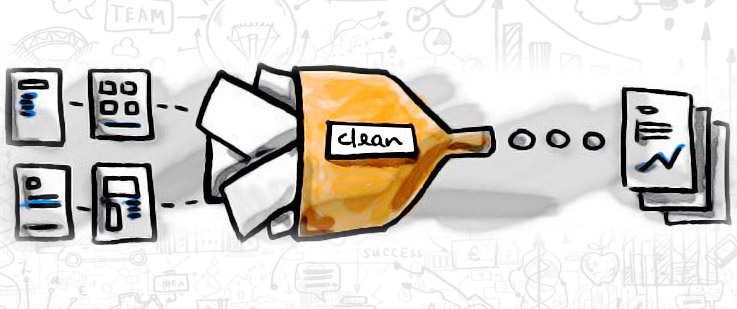

Created by : Khawaritzmi Abdallah Ahmad

In [33]:
# import the library
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Dataset : Mice Protein Expression Data Set
[teks link](https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression)

**Source:**

Clara Higuera Department of Software Engineering and Artificial Intelligence, Faculty of Informatics and the Department of Biochemistry and Molecular Biology, Faculty of Chemistry, University Complutense, Madrid, Spain.
Email: clarahiguera '@' ucm.es

Katheleen J. Gardiner, creator and owner of the protein expression data, is currently with the Linda Crnic Institute for Down Syndrome, Department of Pediatrics, Department of Biochemistry and Molecular Genetics, Human Medical Genetics and Genomics, and Neuroscience Programs, University of Colorado, School of Medicine, Aurora, Colorado, USA.
Email: katheleen.gardiner '@' ucdenver.edu

Krzysztof J. Cios is currently with the Department of Computer Science, Virginia Commonwealth University, Richmond, Virginia, USA, and IITiS Polish Academy of Sciences, Poland.
Email: kcios '@' vcu.edu

**Data Set Information:**

The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse.

The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.

Classes:
c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

The aim is to identify subsets of proteins that are discriminant between the classes. 

**Attribute Information:**

1 Mouse ID
2..78 Values of expression levels of 77 proteins; the names of proteins are followed by â€œ_nâ€ indicating that they were measured in the nuclear fraction. For example: DYRK1A_n
79 Genotype: control (c) or trisomy (t)
80 Treatment type: memantine (m) or saline (s)
81 Behavior: context-shock (CS) or shock-context (SC)
82 Class: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m 

# Dataset Exploration 

In [34]:
# import the dataset from ur drive directly using the path from drive
df = pd.read_csv("/content/drive/My Drive/Datasets/Data_Cortex_Nuclear.csv")	

In [98]:
df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment
0,0.151122,0.212885,0.824638,0.612119,0.630482,0.327006,0.448666,0.168257,0.617322,0.232553,0.157643,0.576167,0.747688,0.598504,0.574775,0.286697,0.650637,0.698164,0.622784,0.711198,0.136915,0.419649,0.317149,0.593715,0.627907,0.596269,0.640167,0.643070,0.766146,0.295596,0.549817,0.747441,0.092035,0.541196,0.152338,0.687269,0.553922,0.467278,0.509996,0.469461,0.436170,0.506018,0.163368,0.323059,0.373254,0.604516,0.303363,0.178458,0.324085,0.402810,0.083584,0.327870,0.690257,0.426816,0.412721,0.477834,0.057168,0.228825,0.531163,0.151103,0.242608,0.169702,0.432843,0.483783,0.044770,0.256699,0.405228,0.162941,0.177312,0.299172,0.426816,0.133930,0.336299,0.087715,0.102890,0.084580,0.705738,1.0
1,0.155750,0.188226,0.776455,0.601070,0.585247,0.311887,0.429899,0.154925,0.590173,0.205362,0.159721,0.559556,0.688545,0.559598,0.502766,0.270688,0.587926,0.591606,0.629311,0.689095,0.128911,0.383669,0.291583,0.548032,0.578736,0.584234,0.614355,0.586180,0.724593,0.251840,0.491969,0.701976,0.075589,0.467650,0.137451,0.621033,0.512117,0.409897,0.457694,0.410046,0.383101,0.447496,0.145594,0.322736,0.376914,0.618918,0.302059,0.177452,0.324004,0.386524,0.084514,0.326426,0.664894,0.429952,0.463251,0.488028,0.075103,0.251911,0.576828,0.149555,0.285860,0.212421,0.472327,0.477640,0.054452,0.226088,0.433471,0.220010,0.146494,0.299172,0.429952,0.110434,0.365208,0.080692,0.115874,0.093977,0.749771,1.0
2,0.153459,0.205696,0.793572,0.558911,0.575910,0.306369,0.441381,0.153485,0.607102,0.199194,0.154554,0.541938,0.670905,0.560573,0.554483,0.283848,0.590443,0.581558,0.669753,0.670907,0.128651,0.415579,0.292676,0.549983,0.599925,0.580790,0.625756,0.613502,0.730384,0.270560,0.472444,0.710718,0.076445,0.470688,0.137475,0.616142,0.510175,0.375653,0.467725,0.400225,0.356363,0.432379,0.125773,0.334325,0.383316,0.657565,0.332565,0.189744,0.369553,0.373234,0.094486,0.312439,0.700212,0.448652,0.415863,0.475009,0.071718,0.248192,0.607535,0.150434,0.373879,0.202733,0.467603,0.484953,0.044526,0.214719,0.429387,0.186816,0.155920,0.299172,0.448652,0.121560,0.353621,0.080465,0.109050,0.082162,0.868229,1.0
3,0.125169,0.157688,0.637326,0.468152,0.480646,0.335530,0.444307,0.132074,0.486945,0.205135,0.127028,0.554293,0.657048,0.640641,0.413245,0.211238,0.522319,0.627585,0.687775,0.593408,0.121509,0.401866,0.319599,0.342080,0.452058,0.545716,0.625528,0.492220,0.667283,0.277208,0.440780,0.536330,0.076936,0.479533,0.144945,0.605654,0.514305,0.338199,0.461189,0.406715,0.402786,0.422989,0.267936,0.220414,0.311501,0.549444,0.364189,0.181101,0.231762,0.333033,0.076248,0.338264,0.669358,0.392700,0.372772,0.397939,0.053257,0.245676,0.562594,0.156083,0.242672,0.184790,0.364359,0.449304,0.119259,0.208943,0.407971,0.179047,0.229602,0.299172,0.392700,0.151031,0.265619,0.126763,0.164241,0.144543,0.721879,1.0
4,0.122146,0.157838,0.637787,0.426467,0.441977,0.314976,0.433100,0.129086,0.410194,0.189152,0.117572,0.532161,0.608970,0.551236,0.401706,0.200364,0.486489,0.579839,0.698127,0.557701,0.112407,0.381348,0.297196,0.358746,0.433909,0.519977,0.599623,0.471524,0.627685,0.239874,0.410395,0.519186,0.067645,0.436522,0.121261,0.548237,0.501294,0.283304,0.416698,0.372548,0.353712,0.374357,0.262839,0.212521,0.317400,0.559551,0.376199,0.181805,0.258720,0.337126,0.079697,0.330219,0.686524,0.410187,0.385008,0.422195,0.080162,0.234762,0.656300,0.147044,0.325597,0.187625,0.393332,0.480334,0.116965,0.215528,0.480342,

In [99]:
df.columns

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'Treatment'],
      dtype='object')

In [100]:
df.head(20)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment
0,0.151122,0.212885,0.824638,0.612119,0.630482,0.327006,0.448666,0.168257,0.617322,0.232553,0.157643,0.576167,0.747688,0.598504,0.574775,0.286697,0.650637,0.698164,0.622784,0.711198,0.136915,0.419649,0.317149,0.593715,0.627907,0.596269,0.640167,0.643070,0.766146,0.295596,0.549817,0.747441,0.092035,0.541196,0.152338,0.687269,0.553922,0.467278,0.509996,0.469461,0.436170,0.506018,0.163368,0.323059,0.373254,0.604516,0.303363,0.178458,0.324085,0.402810,0.083584,0.327870,0.690257,0.426816,0.412721,0.477834,0.057168,0.228825,0.531163,0.151103,0.242608,0.169702,0.432843,0.483783,0.044770,0.256699,0.405228,0.162941,0.177312,0.299172,0.426816,0.133930,0.336299,0.087715,0.102890,0.084580,0.705738,1.0
1,0.155750,0.188226,0.776455,0.601070,0.585247,0.311887,0.429899,0.154925,0.590173,0.205362,0.159721,0.559556,0.688545,0.559598,0.502766,0.270688,0.587926,0.591606,0.629311,0.689095,0.128911,0.383669,0.291583,0.548032,0.578736,0.584234,0.614355,0.586180,0.724593,0.251840,0.491969,0.701976,0.075589,0.467650,0.137451,0.621033,0.512117,0.409897,0.457694,0.410046,0.383101,0.447496,0.145594,0.322736,0.376914,0.618918,0.302059,0.177452,0.324004,0.386524,0.084514,0.326426,0.664894,0.429952,0.463251,0.488028,0.075103,0.251911,0.576828,0.149555,0.285860,0.212421,0.472327,0.477640,0.054452,0.226088,0.433471,0.220010,0.146494,0.299172,0.429952,0.110434,0.365208,0.080692,0.115874,0.093977,0.749771,1.0
2,0.153459,0.205696,0.793572,0.558911,0.575910,0.306369,0.441381,0.153485,0.607102,0.199194,0.154554,0.541938,0.670905,0.560573,0.554483,0.283848,0.590443,0.581558,0.669753,0.670907,0.128651,0.415579,0.292676,0.549983,0.599925,0.580790,0.625756,0.613502,0.730384,0.270560,0.472444,0.710718,0.076445,0.470688,0.137475,0.616142,0.510175,0.375653,0.467725,0.400225,0.356363,0.432379,0.125773,0.334325,0.383316,0.657565,0.332565,0.189744,0.369553,0.373234,0.094486,0.312439,0.700212,0.448652,0.415863,0.475009,0.071718,0.248192,0.607535,0.150434,0.373879,0.202733,0.467603,0.484953,0.044526,0.214719,0.429387,0.186816,0.155920,0.299172,0.448652,0.121560,0.353621,0.080465,0.109050,0.082162,0.868229,1.0
3,0.125169,0.157688,0.637326,0.468152,0.480646,0.335530,0.444307,0.132074,0.486945,0.205135,0.127028,0.554293,0.657048,0.640641,0.413245,0.211238,0.522319,0.627585,0.687775,0.593408,0.121509,0.401866,0.319599,0.342080,0.452058,0.545716,0.625528,0.492220,0.667283,0.277208,0.440780,0.536330,0.076936,0.479533,0.144945,0.605654,0.514305,0.338199,0.461189,0.406715,0.402786,0.422989,0.267936,0.220414,0.311501,0.549444,0.364189,0.181101,0.231762,0.333033,0.076248,0.338264,0.669358,0.392700,0.372772,0.397939,0.053257,0.245676,0.562594,0.156083,0.242672,0.184790,0.364359,0.449304,0.119259,0.208943,0.407971,0.179047,0.229602,0.299172,0.392700,0.151031,0.265619,0.126763,0.164241,0.144543,0.721879,1.0
4,0.122146,0.157838,0.637787,0.426467,0.441977,0.314976,0.433100,0.129086,0.410194,0.189152,0.117572,0.532161,0.608970,0.551236,0.401706,0.200364,0.486489,0.579839,0.698127,0.557701,0.112407,0.381348,0.297196,0.358746,0.433909,0.519977,0.599623,0.471524,0.627685,0.239874,0.410395,0.519186,0.067645,0.436522,0.121261,0.548237,0.501294,0.283304,0.416698,0.372548,0.353712,0.374357,0.262839,0.212521,0.317400,0.559551,0.376199,0.181805,0.258720,0.337126,0.079697,0.330219,0.686524,0.410187,0.385008,0.422195,0.080162,0.234762,0.656300,0.147044,0.325597,0.187625,0.393332,0.480334,0.116965,0.215528,0.480342,

In [105]:
df.value_counts()

DYRK1A_N  ITSN1_N   BDNF_N    NR1_N     NR2A_N    pAKT_N    pBRAF_N   pCAMKII_N  pCREB_N   pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N    pNR1_N    pNR2A_N   pNR2B_N   pPKCAB_N  pRSK_N    AKT_N     BRAF_N    CAMKII_N  CREB_N    ELK_N     ERK_N     GSK3B_N   JNK_N     MEK_N     TRKA_N    RSK_N     APP_N     Bcatenin_N  SOD1_N    MTOR_N    P38_N     pMTOR_N   DSCR1_N   AMPKA_N   NR2B_N    pNUMB_N   RAPTOR_N  TIAM1_N   pP70S6_N  NUMB_N    P70S6_N   pGSK3B_N  pPKCG_N   CDK5_N    S6_N      ADARB1_N  AcetylH3K9_N  RRP1_N    BAX_N     ARC_N     ERBB4_N   nNOS_N    Tau_N     GFAP_N    GluR3_N   GluR4_N   IL1B_N    P3525_N   pCASP9_N  PSD95_N   SNCA_N    Ubiquitin_N  pGSK3B_Tyr216_N  SHH_N     BAD_N     BCL2_N    pS6_N     pCFOS_N   SYP_N     H3AcK18_N  EGR1_N    H3MeK4_N  CaNA_N    Treatment
1.000000  0.922090  0.860280  0.718751  0.612308  0.261800  0.439599  0.124259   0.585441  0.749231  1.000000  0.563486  0.560457  0.533986  0.616813  0.386481  0.683950  0.636985  0.550394  0.745226  0

In [106]:
column_names = df.columns
column_names_class = column_names[78:]
column_names_class

Index([], dtype='object')

In [107]:
for i in column_names_class:
  print(df[i].value_counts())

In [41]:
# sns.set()
# cols = column_names
# sns.pairplot(df[cols], size = 2.5)
# plt.show();

In [108]:
for i in column_names_class:
  df[i].value_counts().plot(kind='bar', title='Count (target)')
  plt.show()

In [109]:
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.118296,0.157699,0.533818,0.398234,0.312289,0.357140,0.465586,0.358347,0.515739,0.175861,0.116092,0.592309,0.447721,0.543930,0.358645,0.393868,0.520302,0.383990,0.625033,0.552729,0.117930,0.402902,0.324663,0.293115,0.330176,0.439416,0.573043,0.468250,0.615829,0.308597,0.426157,0.397406,0.196593,0.528412,0.265717,0.618246,0.564788,0.299225,0.483378,0.384993,0.364580,0.373346,0.263870,0.317668,0.448406,0.399618,0.398041,0.174897,0.431856,0.332364,0.116539,0.339034,0.633717,0.593119,0.518622,0.506606,0.225565,0.272731,0.502968,0.116231,0.401740,0.354801,0.401129,0.615596,0.374644,0.426158,0.432668,0.349804,0.359346,0.299172,0.593119,0.266694,0.374174,0.224755,0.304119,0.332097,0.486813,1.472222
std,0.105024,0.106601,0.129103,0.142908,0.138147,0.087380,0.106727,0.211332,0.168230,0.082025,0.100900,0.117616,0.184610,0.114909,0.129740,0.165937,0.111611,0.192942,0.119959,0.113850,0.108612,0.140051,0.127881,0.144441,0.160450,0.105140,0.099309,0.152651,0.150281,0.142097,0.153847,0.169737,0.169212,0.137503,0.126409,0.127596,0.131993,0.131729,0.111884,0.141288,0.162984,0.138732,0.156257,0.147532,0.129386,0.126003,0.207833,0.058751,0.198497,0.179902,0.131718,0.047296,0.111520,0.156038,0.138927,0.154772,0.136239,0.103785,0.158836,0.057889,0.135468,0.127023,0.143177,0.152170,0.154429,0.151395,0.150369,0.143213,0.136600,0.130048,0.156038,0.134524,0.132609,0.135530,0.142114,0.154010,0.205484,0.499459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.060242,0.096852,0.451515,0.300115,0.210933,0.299665,0.397498,0.185596,0.403317,0.136755,0.055107,0.519854,0.319999,0.467309,0.268097,0.274004,0.445723,0.240945,0.555315,0.476756,0.060548,0.315918,0.234217,0.195291,0.211945,0.375199,0.510797,0.373295,0.521355,0.213637,0.329602,0.273093,0.061960,0.441161,0.175995,0.539472,0.493888,0.2

In [110]:
for i in column_names:
  print(f"{i} bertipe data {df[i].dtypes}")

DYRK1A_N bertipe data float64
ITSN1_N bertipe data float64
BDNF_N bertipe data float64
NR1_N bertipe data float64
NR2A_N bertipe data float64
pAKT_N bertipe data float64
pBRAF_N bertipe data float64
pCAMKII_N bertipe data float64
pCREB_N bertipe data float64
pELK_N bertipe data float64
pERK_N bertipe data float64
pJNK_N bertipe data float64
PKCA_N bertipe data float64
pMEK_N bertipe data float64
pNR1_N bertipe data float64
pNR2A_N bertipe data float64
pNR2B_N bertipe data float64
pPKCAB_N bertipe data float64
pRSK_N bertipe data float64
AKT_N bertipe data float64
BRAF_N bertipe data float64
CAMKII_N bertipe data float64
CREB_N bertipe data float64
ELK_N bertipe data float64
ERK_N bertipe data float64
GSK3B_N bertipe data float64
JNK_N bertipe data float64
MEK_N bertipe data float64
TRKA_N bertipe data float64
RSK_N bertipe data float64
APP_N bertipe data float64
Bcatenin_N bertipe data float64
SOD1_N bertipe data float64
MTOR_N bertipe data float64
P38_N bertipe data float64
pMTOR_N be

In [45]:
df = df.drop(['MouseID','Behavior', 'Genotype', 'class'],axis=1)

In [46]:
df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Memantine
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Memantine
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Memantine
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Memantine
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878

# Handle Missing Value

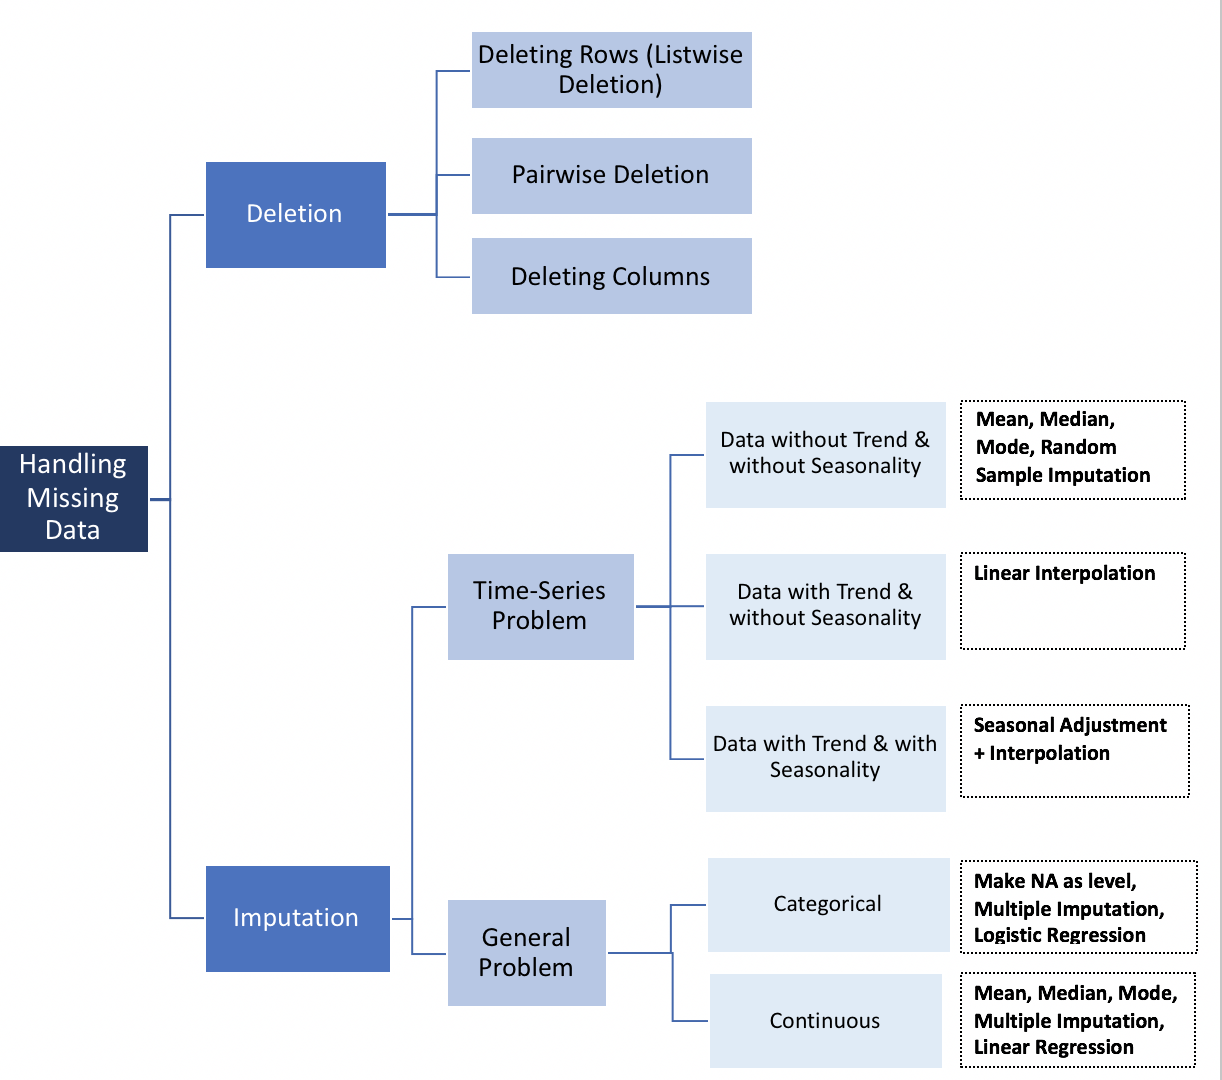

In [47]:
df["DYRK1A_N"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1075    False
1076    False
1077    False
1078    False
1079    False
Name: DYRK1A_N, Length: 1080, dtype: bool

In [48]:
 df.isnull().sum()

DYRK1A_N       3
ITSN1_N        3
BDNF_N         3
NR1_N          3
NR2A_N         3
            ... 
H3AcK18_N    180
EGR1_N       210
H3MeK4_N     270
CaNA_N         0
Treatment      0
Length: 78, dtype: int64

In [49]:
df.shape

(1080, 78)

In [50]:
# df_remove_byindex = df.dropna(axis = 1, how ='all', inplace = True)#---> drop missing value
# Determine if rows or columns which contain missing values are removed.

#     0, or ‘index’ : Drop rows which contain missing values.

#     1, or ‘columns’ : Drop columns which contain missing value.
# print(df_remove_byindex)

In [51]:
# df_remove_byindex.isnull().sum

In [52]:
df = df.fillna(df.mean()) #fill missing value using mean
# df = df.fillna(df.median()) #fill missing value using median
df.isnull().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Treatment    0
Length: 78, dtype: int64

In [53]:
df["Treatment"].value_counts()

Memantine    570
Saline       510
Name: Treatment, dtype: int64

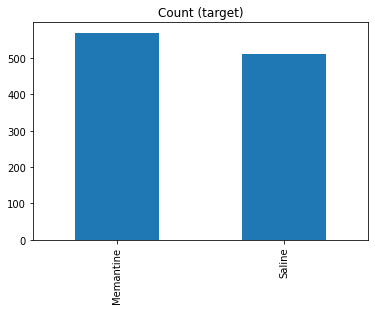

In [54]:
df["Treatment"].value_counts().plot(kind='bar', title='Count (target)')

In [55]:
#category = pd.get_dummies(df.Treatment)
#df_baru = pd.concat([df, category], axis=1)
#df_baru = df_baru.drop(columns='Treatment')
#df_baru

# Categorical encoding using Label-Encoding and One-Hot-Encoder

1. One Hot Encoding

In [56]:
one_hot_encoded_data = pd.get_dummies(df, columns = ["Treatment"])
print(one_hot_encoded_data)

      DYRK1A_N   ITSN1_N  ...  Treatment_Memantine  Treatment_Saline
0     0.503644  0.747193  ...                    1                 0
1     0.514617  0.689064  ...                    1                 0
2     0.509183  0.730247  ...                    1                 0
3     0.442107  0.617076  ...                    1                 0
4     0.434940  0.617430  ...                    1                 0
...        ...       ...  ...                  ...               ...
1075  0.254860  0.463591  ...                    0                 1
1076  0.272198  0.474163  ...                    0                 1
1077  0.228700  0.395179  ...                    0                 1
1078  0.221242  0.412894  ...                    0                 1
1079  0.302626  0.461059  ...                    0                 1

[1080 rows x 79 columns]


2. Label Encoding

In [57]:
cleanup_nums = {"Treatment":     {"Memantine": 1.0, "Saline": 2.0}}
df.replace(cleanup_nums, inplace=True)
df.head()
df.dtypes

DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
NR2A_N       float64
              ...   
H3AcK18_N    float64
EGR1_N       float64
H3MeK4_N     float64
CaNA_N       float64
Treatment    float64
Length: 78, dtype: object

In [58]:
df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,1.0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.134762,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,1.0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,0.134762,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,1.0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,0.134762,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,1.0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,

In [59]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [60]:
X

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.134762,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,0.134762,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,0.134762,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.129954,0.134762

In [61]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1075    2.0
1076    2.0
1077    2.0
1078    2.0
1079    2.0
Name: Treatment, Length: 1080, dtype: float64

In [316]:
# X = df.drop("Treatment",1)   #Feature Matrix
# y = df["Treatment"]          #Target Variable
# df.head()
# print(X)

In [62]:
column_name = list(X.columns) 

In [63]:
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,0.545904,0.313505,0.317939,0.275033,0.825813,0.726933,1.561965,1.525338,0.442848,0.682236,0.378519,0.363357,0.180492,1.173400,2.474492,1.172603,0.241644,0.272789,0.693180,0.168417,0.404808,2.146550,0.542635,0.452459,0.415311,0.759047,0.585186,0.368370,0.565317,0.357095,0.315813,0.418605,0.394475,0.181080,0.943116,0.161211,1.706599,0.292434,0.429226,1.197420,0.216482,0.166631,0.179307,0.121521,0.156478,0.181300,0.210489,0.120889,0.221851,0.126560,0.527349,0.291276,1.548348,2.235236,0.159821,1.239270,0.848767,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784,1.472222
std,0.249015,0.251290,0.049314,0.346810,0.931802,0.041577,0.027004,1.293368,0.032542,0.466254,0.344829,0.051906,0.052164,0.046099,0.117805,0.187752,0.270361,0.481110,0.066579,0.127257,0.216087,0.052279,0.026334,0.332973,0.652488,0.244411,0.033854,0.040942,0.120657,0.028099,0.061088,0.432092,0.280178,0.065397,0.089166,0.122276,0.100461,0.062496,0.088079,0.062938,0.054087,0.067194,0.155953,0.029296,0.172838,0.019308,0.578442,0.037380,0.137440,0.361743,0.185309,0.031896,0.018826,0.014276,0.015071,0.024919,0.069010,0.013233,0.034886,0.026885,0.082057,0.030015,0.248132,0.254395,0.024150,0.173580,0.094311,0.028989,0.026461,0.023519,0.014276,0.023018,0.066432,0.054222,0.036261,0.048069,0.317126,0.499459
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,0.149155,0.052110,0.191431,0.056818,0.500160,0.281285,0.301609,0.567840,0.095942,0.064421,0.143894,0.212960,0.113636,0.497695,1.131796,0.151124,0.046298,0.147201,0.198743,0.107394,0.235595,1.134886,0.217120,0.201143,0.227880,0.166579,0.155321,0.226409,0.184785,0.185598,0.194824,0.237777,0.131120,0.117999,0.344120,0.099976,0.598767,0.181157,0.130206,0.529108,0.052528,-0.062008,0.072326,0.067254,0.100217,0.099734,0.096233,0.086114,0.111382,0.072580,0.284001,0.207438,0.853176,1.206098,0.101233,0.750664,0.577397,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479,1.000000
25%,0.288163,0.473669,0.287650,2.059152,3.160287,0.205821,0.164619,2.479861,0.190828,1.206389,0.337486,0.281530,0.281850,0.244294,0.743594,0.591311,1.381308,1.168648,0.404152,0.597317,0.264356,0.330887,0.161867,0.947889,1.993693,1.023321,0.220425,0.247322,0.617329,0.149639,0.366469,1.830090,0.319712,0.410961,0.352023,0.683557,0.531223,0.

# Normalization

1. Z-score

In [351]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
df_std = pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)

df_std

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment
0,0.312711,0.517934,2.253669,1.497362,2.304365,-0.345019,-0.158601,-0.899902,0.604115,0.691475,0.411996,-0.137307,1.625620,0.475153,1.666638,-0.646154,1.168309,1.629089,-0.018758,1.392550,0.174875,0.119633,-0.058786,2.082089,1.856458,1.492537,0.676225,1.145759,1.000709,-0.091534,0.804158,2.063178,-0.618198,0.093011,-0.897343,0.541203,-0.082360,1.276335,0.238021,0.598117,0.439453,0.956752,-0.643476,0.036553,-0.581109,1.626891,-0.455759,0.060645,-0.543186,0.391757,-0.250311,-0.236154,0.507232,-1.066276,-0.762636,-0.185986,-1.236610,-0.423238,0.177590,0.602679,-1.175225,-1.457889,0.221607,-0.866619,-2.137075,-1.119835,-0.182566,-1.305403,-1.333224,-1.708195e-15,-1.066276,-0.987371,-0.285744,-1.011615,-1.416624,-1.607891,1.065901,-0.945905
1,0.356798,0.286501,1.880279,1.420009,1.976769,-0.518126,-0.334523,-0.963018,0.442658,0.359831,0.432595,-0.278601,1.305101,0.136414,1.111359,-0.742677,0.606170,1.076550,0.035676,1.198313,0.101144,-0.137387,-0.258798,1.765666,1.549858,1.378016,0.416185,0.772906,0.724076,-0.399609,0.427976,1.795199,-0.715432,-0.442102,-1.015169,0.021853,-0.399228,0.840537,-0.229666,0.177399,0.113691,0.534727,-0.757276,0.034362,-0.552806,1.741243,-0.462039,0.043512,-0.543596,0.301190,-0.243248,-0.266690,0.279699,-1.046167,-0.398749,-0.120088,-1.104906,-0.200696,0.465222,0.575923,-0.855804,-1.121424,0.497507,-0.907006,-2.074347,-1.322118,0.005344,-0.906725,-1.558938,-1.708195e-15,-1.046167,-1.162114,-0.067645,-1.063458,-1.325218,-1.546844,1.280291,-0.945905
2,0.334966,0.450465,2.012928,1.124860,1.909149,-0.581298,-0.226891,-0.969835,0.543335,0.284600,0.381364,-0.428462,1.209506,0.144910,1.510160,-0.663332,0.628739,1.024452,0.372963,1.038485,0.098749,0.090559,-0.250248,1.779180,1.681981,1.345245,0.531041,0.951974,0.762632,-0.267804,0.301001,1.846725,-0.710373,-0.419997,-1.014977,-0.016495,-0.413943,0.580461,-0.139968,0.107858,-0.050439,0.425708,-0.884183,0.112953,-0.503308,2.048102,-0.315190,0.252837,-0.314019,0.227284,-0.167506,-0.562562,0.596537,-0.926271,-0.740008,-0.204246,-1.129764,-0.236554,0.658634,0.591119,-0.205760,-1.197726,0.464494,-0.858927,-2.138655,-1.397250,-0.021831,-1.138611,-1.489897,-1.708195e-15,-0.926271,-1.079366,-0.155059,-1.065130,-1.373257,-1.623595,1.857038,-0.945905
3,0.065474,-0.000103,0.802123,0.489481,1.219245,-0.247424,-0.199461,-1.071196,-0.171236,0.357061,0.108431,-0.323365,1.134410,0.842023,0.421038,-1.101111,0.018084,1.263117,0.523272,0.357460,0.032966,-0.007399,-0.039614,0.339154,0.759976,1.011497,0.528743,0.157103,0.342551,-0.221000,0.095097,0.818847,-0.707469,-0.355644,-0.955857,-0.098733,-0.382644,0.296001,-0.198415,0.153812,0.234528,0.357998,0.026037,-0.659513,-1.058608,1.189617,-0.162955,0.105658,-1.008513,0.003718,-0.306027,-0.016278,0.319739,-1.285019,-1.050318,-0.702437,-1.265327,-0.260806,0.375563,0.688737,-1.174757,-1.339051,-0.256932,-1.093307,-1.654497,-1.435423,-0.164318,-1.192887,-0.950252,-1.708195e-15,-1.285019,-0.860192,-0.818989,-0.723367,-0.984718,-1.218364,1.144490,-0.945905
4,0.036682,0.001305,0.805692,0.197652,0.939202,-0.482759,-0.304516,-1.085341,-0.627671,0.162107,0.014669,-0.511629,0.873860,0.063611,0.332052,-1.166672,-0.303092,1.015538,0.609606,0.043690,-0.050873,-0.153972,-0.214886,0.454586,0.646813,0.766579,0.267771,0.021461,0.078934,-0.483854,-0.102500,0.717794,-0.762401,-0.668588,-1.143303,-0.548935,-0.481256,-0.120918,-0.596250,-0.088123,-0.066710,0.007289,-0.006

2. Min-Max Scaler

In [64]:
print('Min : ', X.min(axis=0))
print('Max : ', X.max(axis=0))

Min :  DYRK1A_N     0.145327
ITSN1_N      0.245359
BDNF_N       0.115181
NR1_N        1.330831
NR2A_N       1.737540
               ...   
SYP_N        0.258626
H3AcK18_N    0.079691
EGR1_N       0.105537
H3MeK4_N     0.101787
CaNA_N       0.586479
Length: 77, dtype: float64
Max :  DYRK1A_N     2.516367
ITSN1_N      2.602662
BDNF_N       0.497160
NR1_N        3.757641
NR2A_N       8.482553
               ...   
SYP_N        0.759588
H3AcK18_N    0.479763
EGR1_N       0.360692
H3MeK4_N     0.413903
CaNA_N       2.129791
Length: 77, dtype: float64


In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(X)

In [66]:
print('Min : ', data_scaled.min(axis=0))
print('Max : ', data_scaled.max(axis=0))

Min :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Max :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


In [67]:
df = pd.DataFrame(data=data_scaled, columns= column_name)
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.151122,0.212885,0.824638,0.612119,0.630482,0.327006,0.448666,0.168257,0.617322,0.232553,0.157643,0.576167,0.747688,0.598504,0.574775,0.286697,0.650637,0.698164,0.622784,0.711198,0.136915,0.419649,0.317149,0.593715,0.627907,0.596269,0.640167,0.643070,0.766146,0.295596,0.549817,0.747441,0.092035,0.541196,0.152338,0.687269,0.553922,0.467278,0.509996,0.469461,0.436170,0.506018,0.163368,0.323059,0.373254,0.604516,0.303363,0.178458,0.324085,0.402810,0.083584,0.327870,0.690257,0.426816,0.412721,0.477834,0.057168,0.228825,0.531163,0.151103,0.242608,0.169702,0.432843,0.483783,0.044770,0.256699,0.405228,0.162941,0.177312,0.299172,0.426816,0.133930,0.336299,0.087715,0.102890,0.084580,0.705738
1,0.155750,0.188226,0.776455,0.601070,0.585247,0.311887,0.429899,0.154925,0.590173,0.205362,0.159721,0.559556,0.688545,0.559598,0.502766,0.270688,0.587926,0.591606,0.629311,0.689095,0.128911,0.383669,0.291583,0.548032,0.578736,0.584234,0.614355,0.586180,0.724593,0.251840,0.491969,0.701976,0.075589,0.467650,0.137451,0.621033,0.512117,0.409897,0.457694,0.410046,0.383101,0.447496,0.145594,0.322736,0.376914,0.618918,0.302059,0.177452,0.324004,0.386524,0.084514,0.326426,0.664894,0.429952,0.463251,0.488028,0.075103,0.251911,0.576828,0.149555,0.285860,0.212421,0.472327,0.477640,0.054452,0.226088,0.433471,0.220010,0.146494,0.299172,0.429952,0.110434,0.365208,0.080692,0.115874,0.093977,0.749771
2,0.153459,0.205696,0.793572,0.558911,0.575910,0.306369,0.441381,0.153485,0.607102,0.199194,0.154554,0.541938,0.670905,0.560573,0.554483,0.283848,0.590443,0.581558,0.669753,0.670907,0.128651,0.415579,0.292676,0.549983,0.599925,0.580790,0.625756,0.613502,0.730384,0.270560,0.472444,0.710718,0.076445,0.470688,0.137475,0.616142,0.510175,0.375653,0.467725,0.400225,0.356363,0.432379,0.125773,0.334325,0.383316,0.657565,0.332565,0.189744,0.369553,0.373234,0.094486,0.312439,0.700212,0.448652,0.415863,0.475009,0.071718,0.248192,0.607535,0.150434,0.373879,0.202733,0.467603,0.484953,0.044526,0.214719,0.429387,0.186816,0.155920,0.299172,0.448652,0.121560,0.353621,0.080465,0.109050,0.082162,0.868229
3,0.125169,0.157688,0.637326,0.468152,0.480646,0.335530,0.444307,0.132074,0.486945,0.205135,0.127028,0.554293,0.657048,0.640641,0.413245,0.211238,0.522319,0.627585,0.687775,0.593408,0.121509,0.401866,0.319599,0.342080,0.452058,0.545716,0.625528,0.492220,0.667283,0.277208,0.440780,0.536330,0.076936,0.479533,0.144945,0.605654,0.514305,0.338199,0.461189,0.406715,0.402786,0.422989,0.267936,0.220414,0.311501,0.549444,0.364189,0.181101,0.231762,0.333033,0.076248,0.338264,0.669358,0.392700,0.372772,0.397939,0.053257,0.245676,0.562594,0.156083,0.242672,0.184790,0.364359,0.449304,0.119259,0.208943,0.407971,0.179047,0.229602,0.299172,0.392700,0.151031,0.265619,0.126763,0.164241,0.144543,0.721879
4,0.122146,0.157838,0.637787,0.426467,0.441977,0.314976,0.433100,0.129086,0.410194,0.189152,0.117572,0.532161,0.608970,0.551236,0.401706,0.200364,0.486489,0.579839,0.698127,0.557701,0.112407,0.381348,0.297196,0.358746,0.433909,0.519977,0.599623,0.471524,0.627685,0.239874,0.410395,0.519186,0.067645,0.436522,0.121261,0.548237,0.501294,0.283304,0.416698,0.372548,0.353712,0.374357,0.262839,0.212521,0.317400,0.559551,0.376199,0.181805,0.258720,0.337126,0.079697,0.330219,0.686524,0.410187,0.385008,0.422195,0.080162,0.234762,0.656300,0.147044,0.325597,0.187625,0.393332,0.480334,0.116965,0.215528,0.480342,0.245702,0.215008,0.299172

In [69]:
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.118296,0.157699,0.533818,0.398234,0.312289,0.357140,0.465586,0.358347,0.515739,0.175861,0.116092,0.592309,0.447721,0.543930,0.358645,0.393868,0.520302,0.383990,0.625033,0.552729,0.117930,0.402902,0.324663,0.293115,0.330176,0.439416,0.573043,0.468250,0.615829,0.308597,0.426157,0.397406,0.196593,0.528412,0.265717,0.618246,0.564788,0.299225,0.483378,0.384993,0.364580,0.373346,0.263870,0.317668,0.448406,0.399618,0.398041,0.174897,0.431856,0.332364,0.116539,0.339034,0.633717,0.593119,0.518622,0.506606,0.225565,0.272731,0.502968,0.116231,0.401740,0.354801,0.401129,0.615596,0.374644,0.426158,0.432668,0.349804,0.359346,0.299172,0.593119,0.266694,0.374174,0.224755,0.304119,0.332097,0.486813
std,0.105024,0.106601,0.129103,0.142908,0.138147,0.087380,0.106727,0.211332,0.168230,0.082025,0.100900,0.117616,0.184610,0.114909,0.129740,0.165937,0.111611,0.192942,0.119959,0.113850,0.108612,0.140051,0.127881,0.144441,0.160450,0.105140,0.099309,0.152651,0.150281,0.142097,0.153847,0.169737,0.169212,0.137503,0.126409,0.127596,0.131993,0.131729,0.111884,0.141288,0.162984,0.138732,0.156257,0.147532,0.129386,0.126003,0.207833,0.058751,0.198497,0.179902,0.131718,0.047296,0.111520,0.156038,0.138927,0.154772,0.136239,0.103785,0.158836,0.057889,0.135468,0.127023,0.143177,0.152170,0.154429,0.151395,0.150369,0.143213,0.136600,0.130048,0.156038,0.134524,0.132609,0.135530,0.142114,0.154010,0.205484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.060242,0.096852,0.451515,0.300115,0.210933,0.299665,0.397498,0.185596,0.403317,0.136755,0.055107,0.519854,0.319999,0.467309,0.268097,0.274004,0.445723,0.240945,0.555315,0.476756,0.060548,0.315918,0.234217,0.195291,0.211945,0.375199,0.510797,0.373295,0.521355,0.213637,0.329602,0.273093,0.061960,0.441161,0.175995,0.539472,0.493888,0.211498,0.419588,0.285492,0.245190,0.277245,0.15130

# How to Detect, Handle and Visualize Outliers

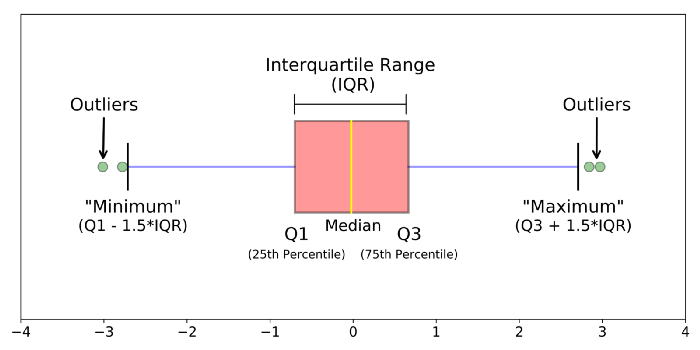

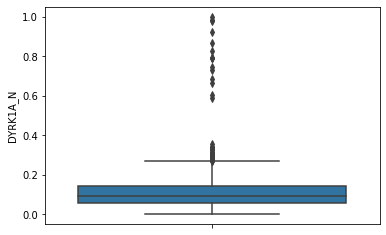

In [323]:
import seaborn as sns
sns.boxplot(y=df['DYRK1A_N'])

In [70]:
df = pd.concat([df, y], axis = 1)
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment
0,0.151122,0.212885,0.824638,0.612119,0.630482,0.327006,0.448666,0.168257,0.617322,0.232553,0.157643,0.576167,0.747688,0.598504,0.574775,0.286697,0.650637,0.698164,0.622784,0.711198,0.136915,0.419649,0.317149,0.593715,0.627907,0.596269,0.640167,0.643070,0.766146,0.295596,0.549817,0.747441,0.092035,0.541196,0.152338,0.687269,0.553922,0.467278,0.509996,0.469461,0.436170,0.506018,0.163368,0.323059,0.373254,0.604516,0.303363,0.178458,0.324085,0.402810,0.083584,0.327870,0.690257,0.426816,0.412721,0.477834,0.057168,0.228825,0.531163,0.151103,0.242608,0.169702,0.432843,0.483783,0.044770,0.256699,0.405228,0.162941,0.177312,0.299172,0.426816,0.133930,0.336299,0.087715,0.102890,0.084580,0.705738,1.0
1,0.155750,0.188226,0.776455,0.601070,0.585247,0.311887,0.429899,0.154925,0.590173,0.205362,0.159721,0.559556,0.688545,0.559598,0.502766,0.270688,0.587926,0.591606,0.629311,0.689095,0.128911,0.383669,0.291583,0.548032,0.578736,0.584234,0.614355,0.586180,0.724593,0.251840,0.491969,0.701976,0.075589,0.467650,0.137451,0.621033,0.512117,0.409897,0.457694,0.410046,0.383101,0.447496,0.145594,0.322736,0.376914,0.618918,0.302059,0.177452,0.324004,0.386524,0.084514,0.326426,0.664894,0.429952,0.463251,0.488028,0.075103,0.251911,0.576828,0.149555,0.285860,0.212421,0.472327,0.477640,0.054452,0.226088,0.433471,0.220010,0.146494,0.299172,0.429952,0.110434,0.365208,0.080692,0.115874,0.093977,0.749771,1.0
2,0.153459,0.205696,0.793572,0.558911,0.575910,0.306369,0.441381,0.153485,0.607102,0.199194,0.154554,0.541938,0.670905,0.560573,0.554483,0.283848,0.590443,0.581558,0.669753,0.670907,0.128651,0.415579,0.292676,0.549983,0.599925,0.580790,0.625756,0.613502,0.730384,0.270560,0.472444,0.710718,0.076445,0.470688,0.137475,0.616142,0.510175,0.375653,0.467725,0.400225,0.356363,0.432379,0.125773,0.334325,0.383316,0.657565,0.332565,0.189744,0.369553,0.373234,0.094486,0.312439,0.700212,0.448652,0.415863,0.475009,0.071718,0.248192,0.607535,0.150434,0.373879,0.202733,0.467603,0.484953,0.044526,0.214719,0.429387,0.186816,0.155920,0.299172,0.448652,0.121560,0.353621,0.080465,0.109050,0.082162,0.868229,1.0
3,0.125169,0.157688,0.637326,0.468152,0.480646,0.335530,0.444307,0.132074,0.486945,0.205135,0.127028,0.554293,0.657048,0.640641,0.413245,0.211238,0.522319,0.627585,0.687775,0.593408,0.121509,0.401866,0.319599,0.342080,0.452058,0.545716,0.625528,0.492220,0.667283,0.277208,0.440780,0.536330,0.076936,0.479533,0.144945,0.605654,0.514305,0.338199,0.461189,0.406715,0.402786,0.422989,0.267936,0.220414,0.311501,0.549444,0.364189,0.181101,0.231762,0.333033,0.076248,0.338264,0.669358,0.392700,0.372772,0.397939,0.053257,0.245676,0.562594,0.156083,0.242672,0.184790,0.364359,0.449304,0.119259,0.208943,0.407971,0.179047,0.229602,0.299172,0.392700,0.151031,0.265619,0.126763,0.164241,0.144543,0.721879,1.0
4,0.122146,0.157838,0.637787,0.426467,0.441977,0.314976,0.433100,0.129086,0.410194,0.189152,0.117572,0.532161,0.608970,0.551236,0.401706,0.200364,0.486489,0.579839,0.698127,0.557701,0.112407,0.381348,0.297196,0.358746,0.433909,0.519977,0.599623,0.471524,0.627685,0.239874,0.410395,0.519186,0.067645,0.436522,0.121261,0.548237,0.501294,0.283304,0.416698,0.372548,0.353712,0.374357,0.262839,0.212521,0.317400,0.559551,0.376199,0.181805,0.258720,0.337126,0.079697,0.330219,0.686524,0.410187,0.385008,0.422195,0.080162,0.234762,0.656300,0.147044,0.325597,0.187625,0.393332,0.480334,0.116965,0.215528,0.480342,

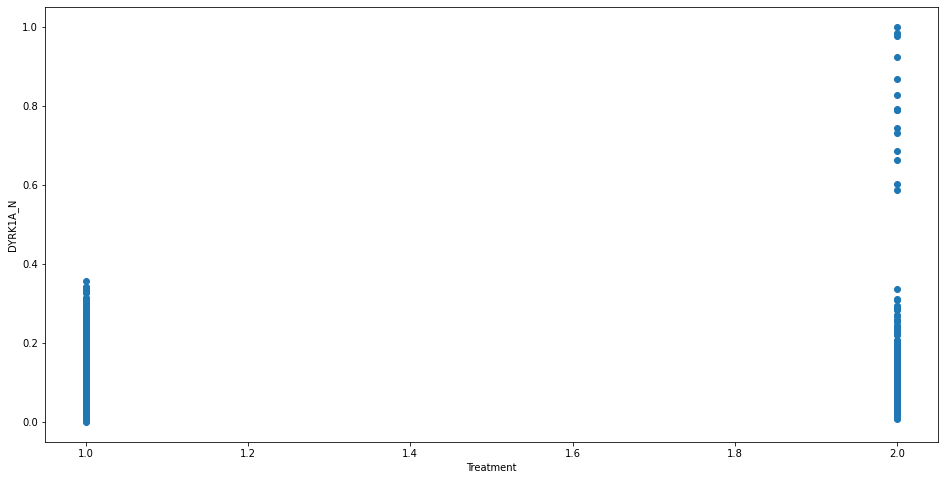

In [71]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Treatment'], df['DYRK1A_N'])
ax.set_xlabel('Treatment')
ax.set_ylabel('DYRK1A_N')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

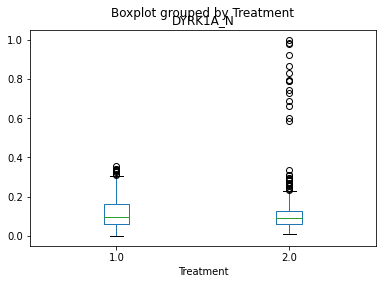

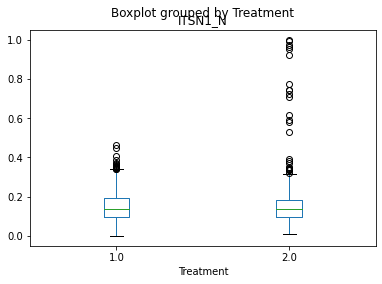

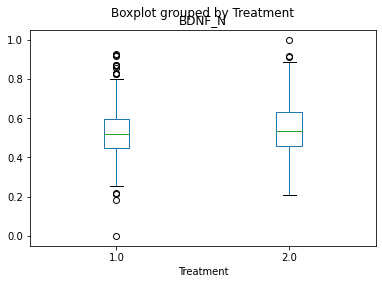

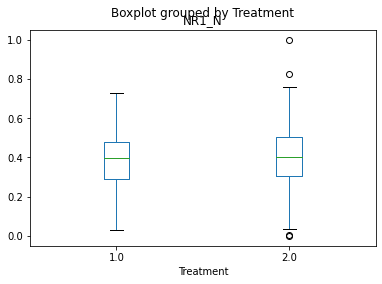

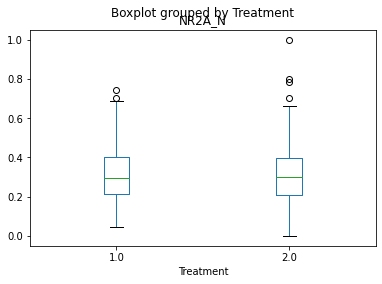

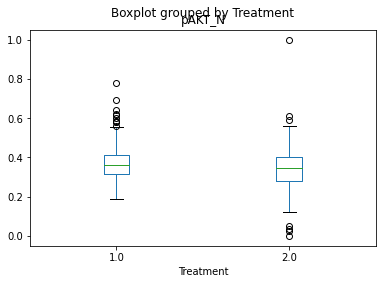

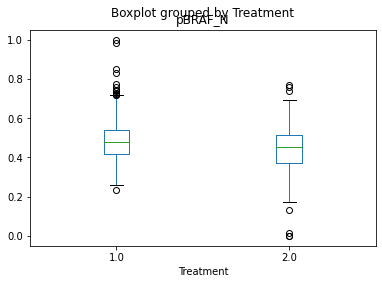

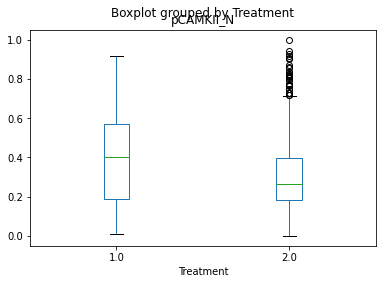

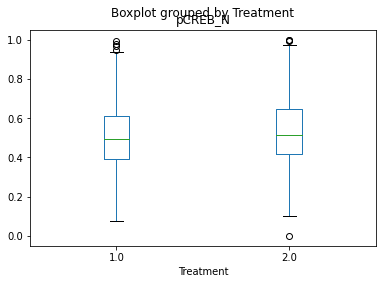

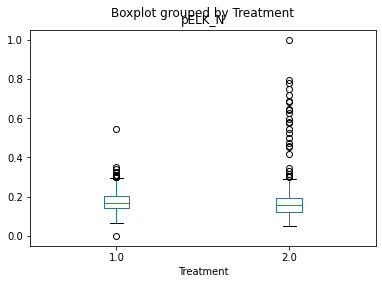

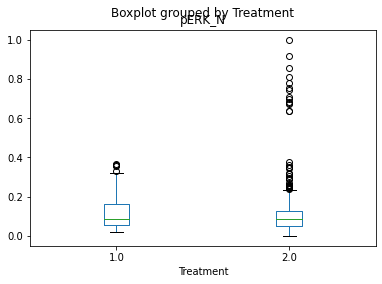

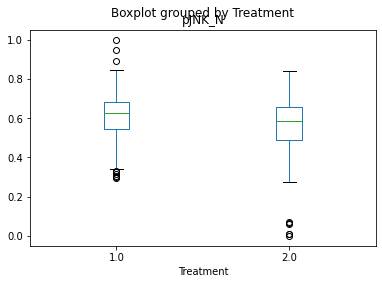

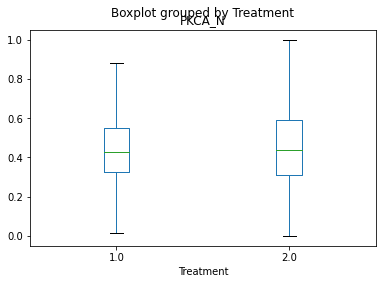

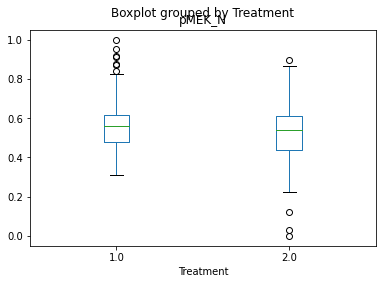

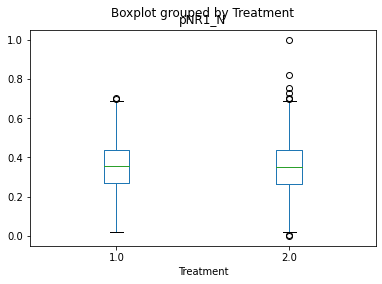

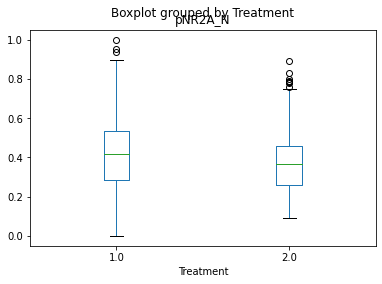

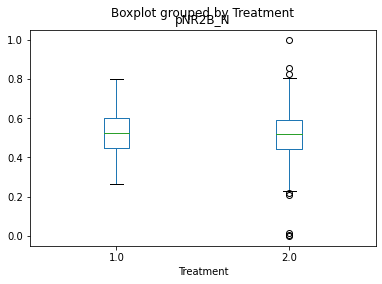

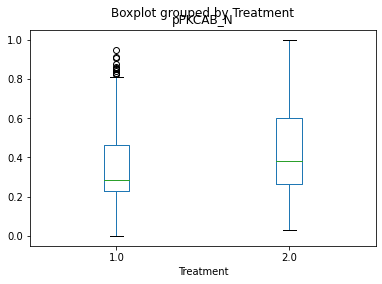

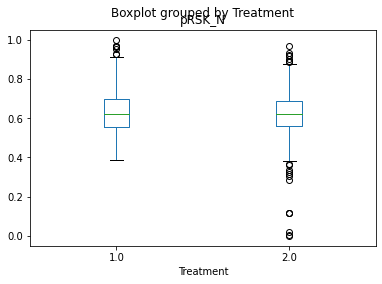

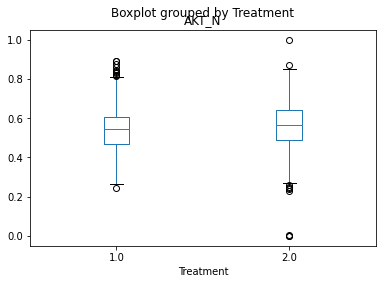

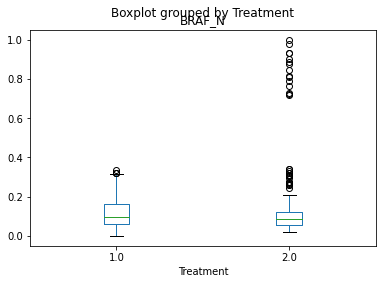

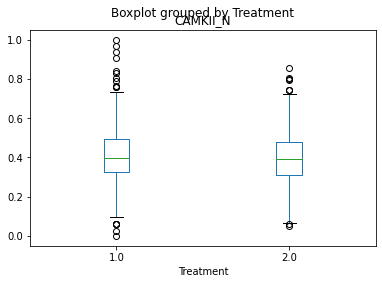

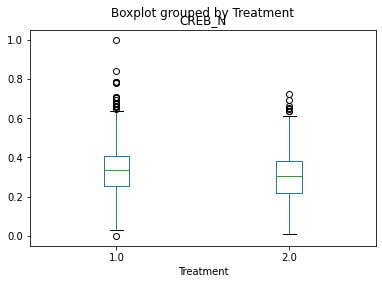

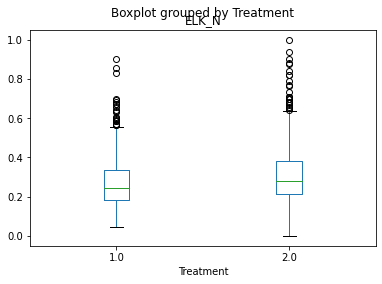

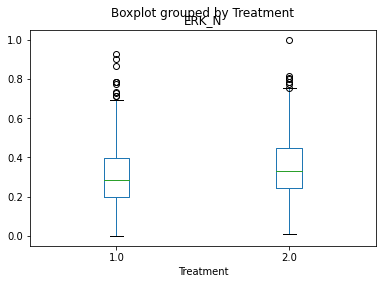

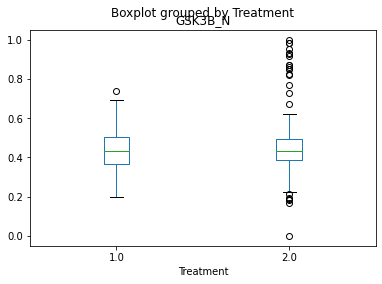

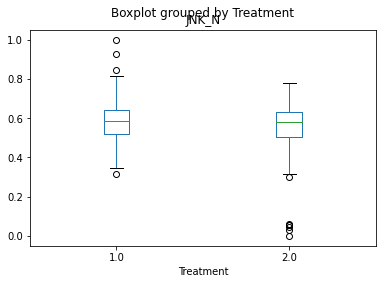

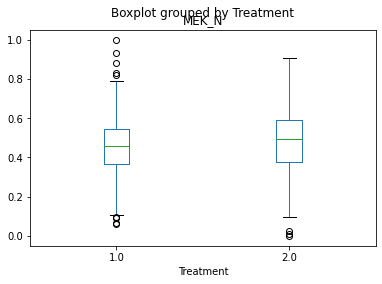

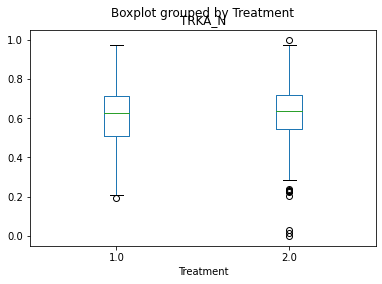

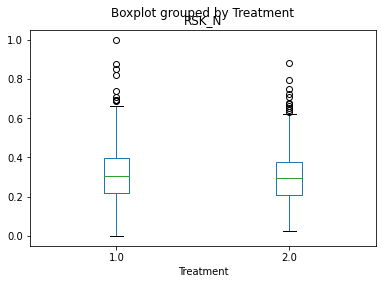

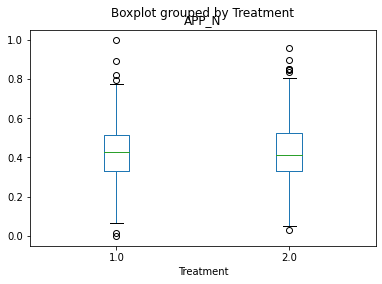

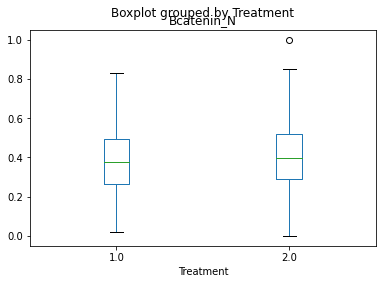

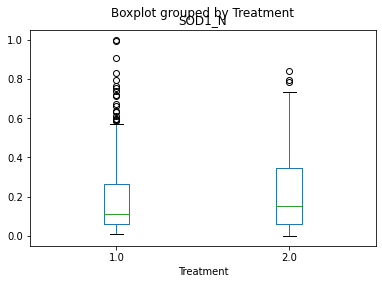

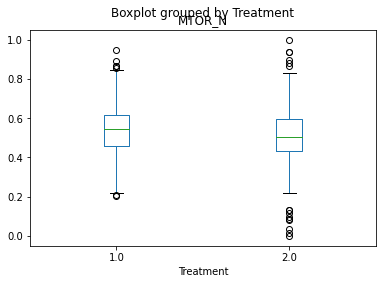

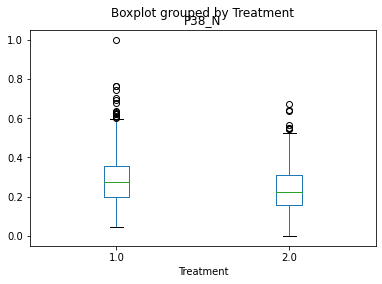

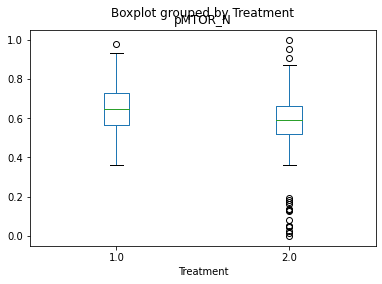

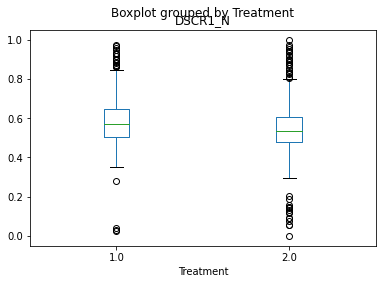

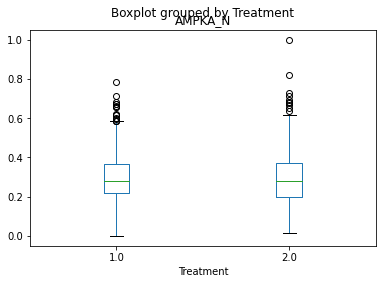

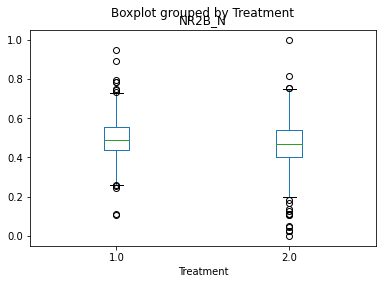

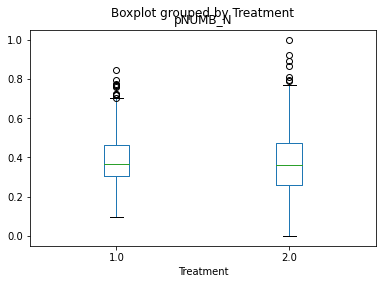

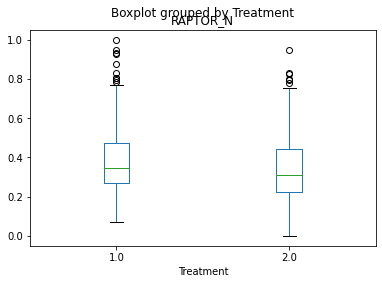

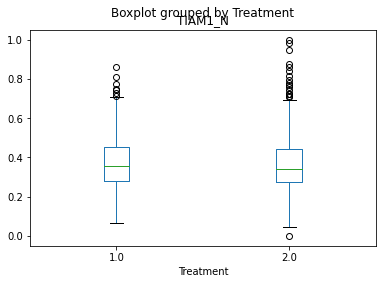

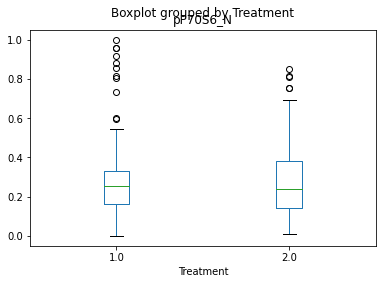

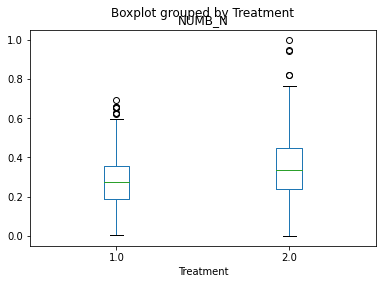

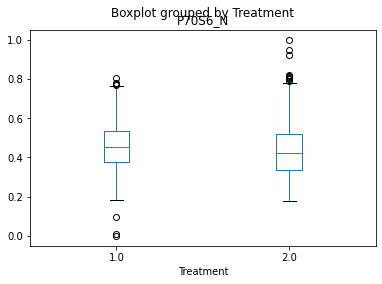

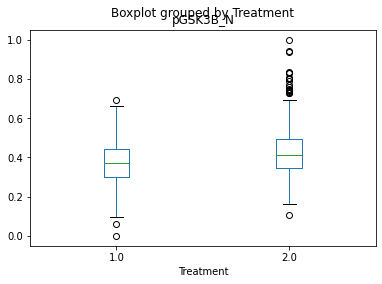

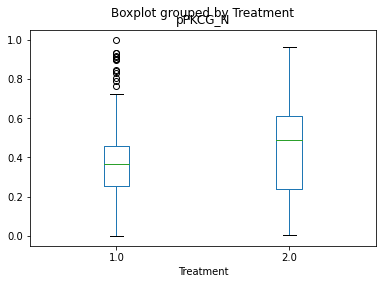

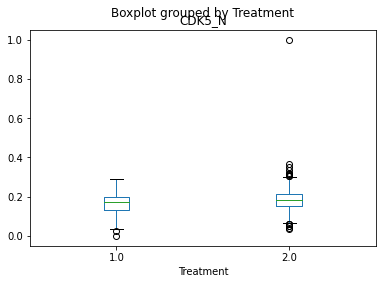

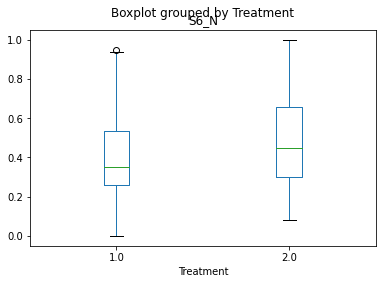

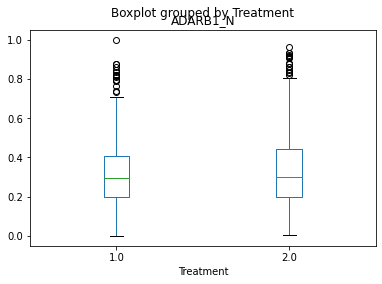

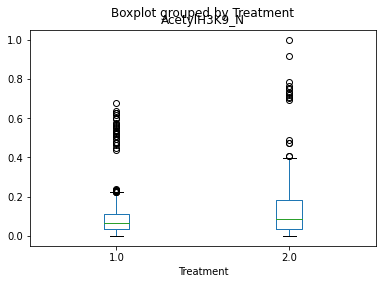

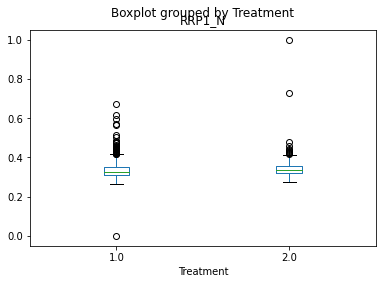

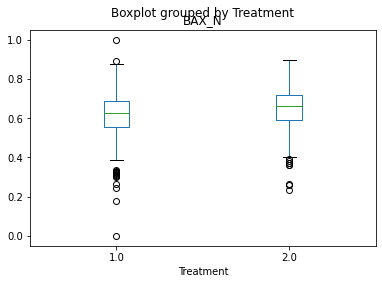

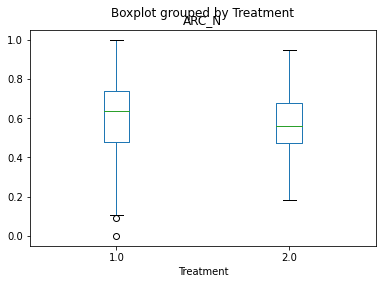

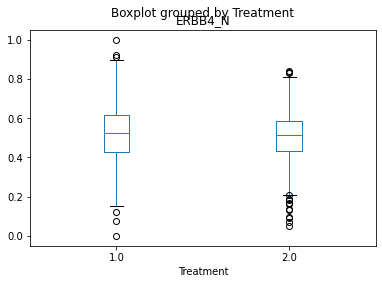

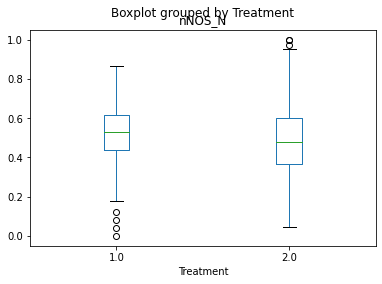

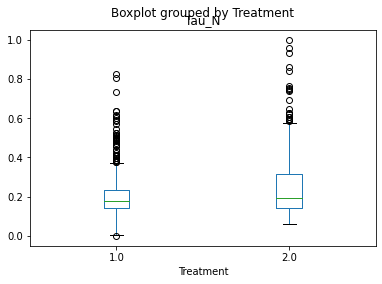

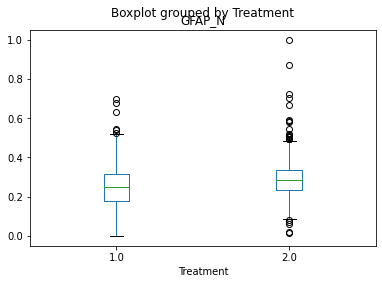

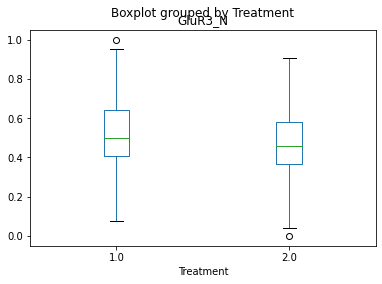

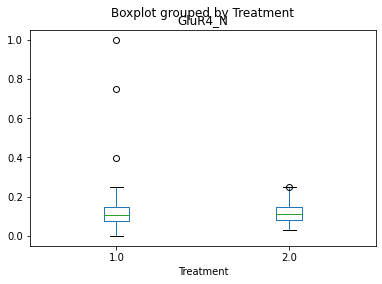

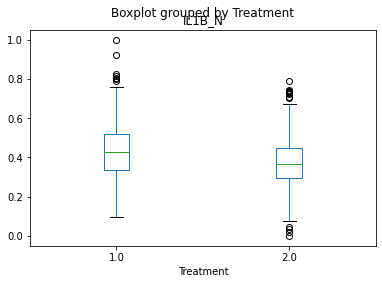

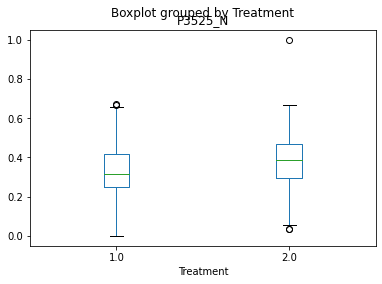

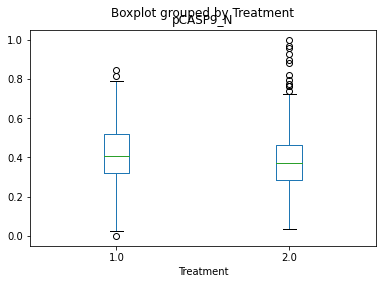

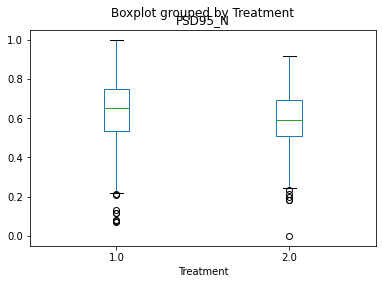

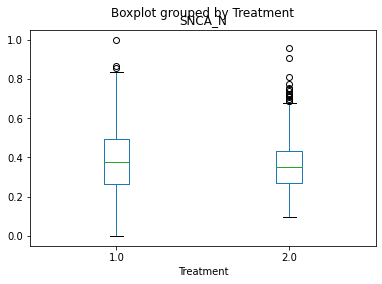

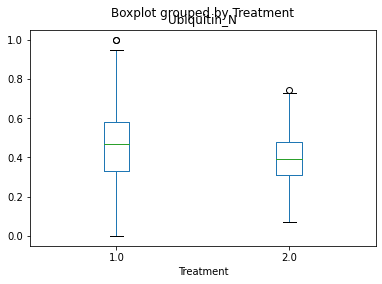

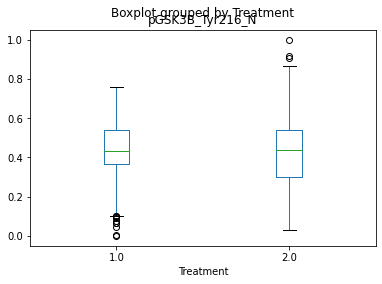

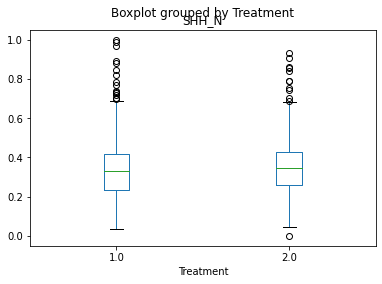

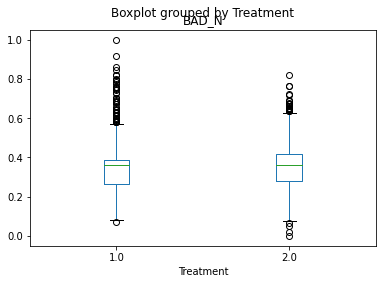

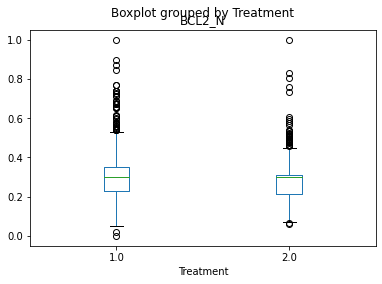

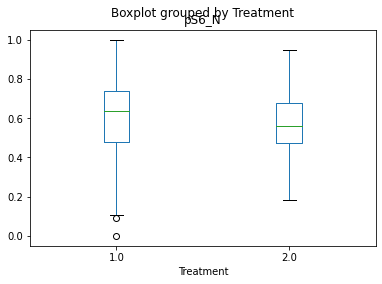

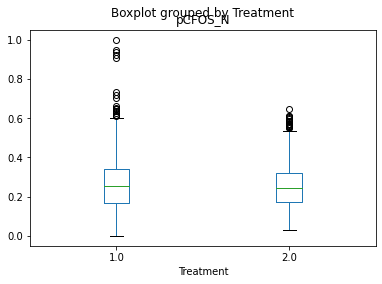

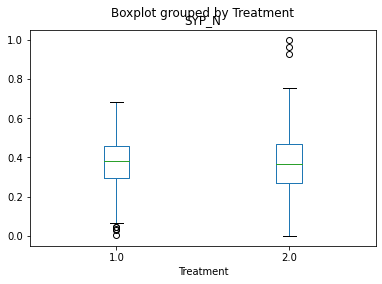

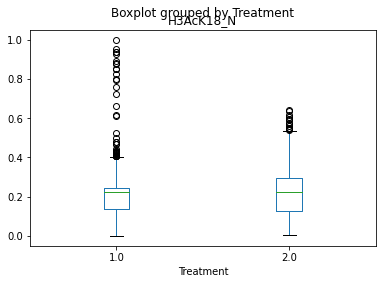

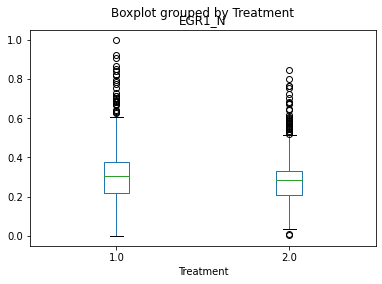

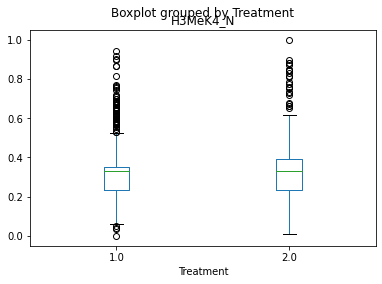

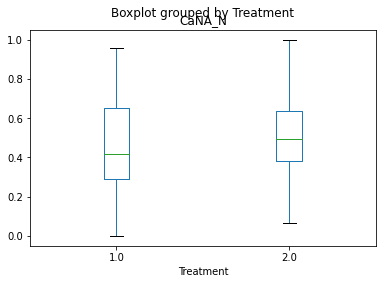

In [73]:
import matplotlib.pyplot as plt  
% matplotlib inline 

x = df.drop("Treatment",1)
columns_name = list(x.columns)

for i in column_name:
  df.boxplot(by ='Treatment', column =[i], grid = False) 
  

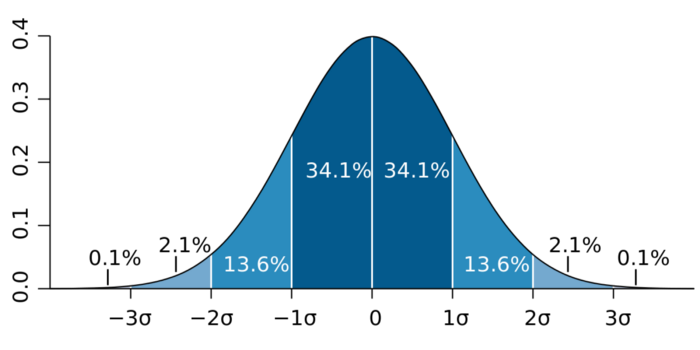

Using Z-Score- It is a unit measured in standard deviation. Basically, it is a measure of a distance from raw score to the mean. It ranges from -3 to +3, where 0= Mean and 1= Standard deviation i.e Normal Distribution.

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution. You must be wondering that, how does this help in identifying the outliers? Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

In [74]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)
#it is difficult to say which data point is an outlier

#defining threshold
threshold = 3
print(np.where(z > 3))
print(z)  

[[0.31271112 0.5179336  2.2536689  ... 1.60789061 1.06590091 0.9459053 ]
 [0.35679793 0.28650133 1.8802795  ... 1.54684392 1.28029118 0.9459053 ]
 [0.33496588 0.45046461 2.01292763 ... 1.62359464 1.85703831 0.9459053 ]
 ...
 [0.79192771 0.88354273 1.72382963 ... 3.11724261 0.29352469 1.05718828]
 [0.82188815 0.8130138  1.52387571 ... 3.32828966 0.2089962  1.05718828]
 [0.49491588 0.62125474 1.26845332 ... 3.32672533 0.10478825 1.05718828]]
(array([  25,   25,   25,   27,   27,   27,   27,   27,   28,   29,   30,
         30,   31,   31,   31,   32,   32,   32,   32,   46,   47,   47,
         87,   87,   87,   87,   87,   87,   87,   87,   88,   88,   88,
         88,   88,   88,   89,   89,  102,  133,  133,  162,  163,  164,
        164,  164,  165,  166,  167,  170,  175,  176,  177,  177,  177,
        177,  177,  178,  178,  178,  178,  178,  179,  179,  179,  181,
        205,  207,  207,  219,  220,  220,  221,  222,  222,  222,  222,
        222,  223,  223,  223,  223,  223,  

In [75]:
df.shape #actual rows

(1080, 78)

In [76]:
#Using Z-Score

dataset_cleared_zscore = df[(z < 3).all(axis=1)]
dataset_cleared_zscore
dataset_cleared_zscore.shape #it will remove some rows

(821, 78)

Algorithm for IQR

    Sort the dataset in increasing order
    Calculate the first quartile(q1) and third quartile (q3)
    Find Interquartile range (q3-q1)
    Find the lower bound - lower_bound = (q1 -1.5 * iqr) 
    Find the upper bound - upper_bound = (q3 +1.5 * iqr)
    Anything that lies above or below the iqr is an outlier

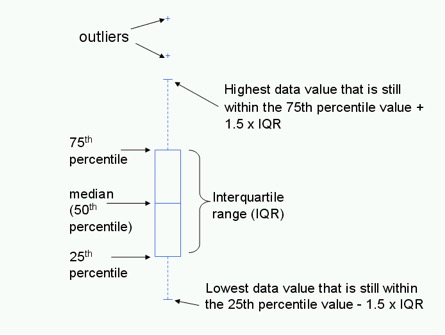

In [77]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

DYRK1A_N     0.084103
ITSN1_N      0.094952
BDNF_N       0.158094
NR1_N        0.193209
NR2A_N       0.187519
               ...   
H3AcK18_N    0.132987
EGR1_N       0.144874
H3MeK4_N     0.144086
CaNA_N       0.326830
Treatment    1.000000
Length: 78, dtype: float64


In [78]:
print(df.shape)

(1080, 78)


In [79]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(543, 78)


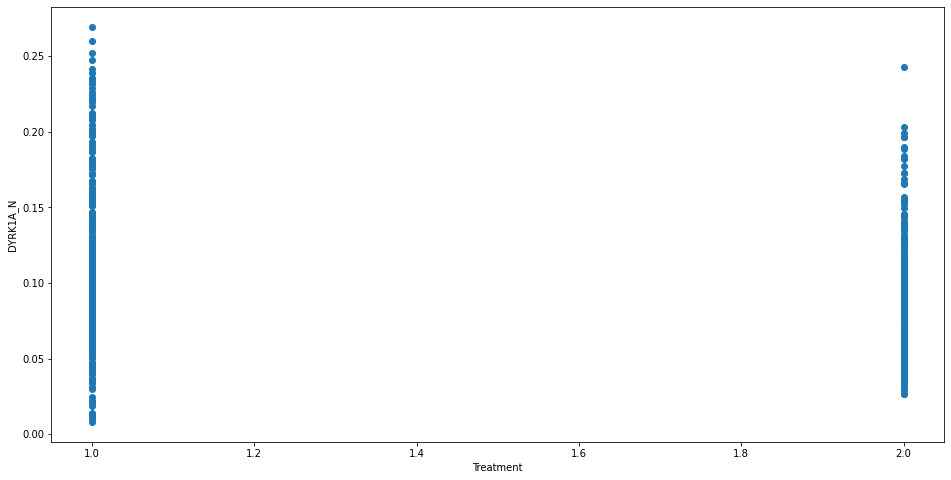

In [80]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_out['Treatment'], df_out['DYRK1A_N'])
ax.set_xlabel('Treatment')
ax.set_ylabel('DYRK1A_N')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

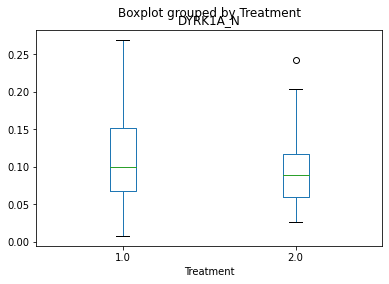

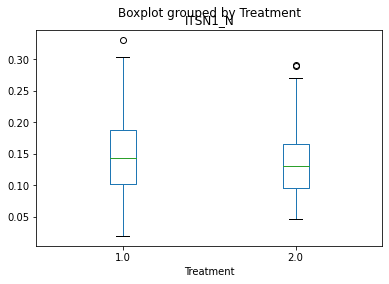

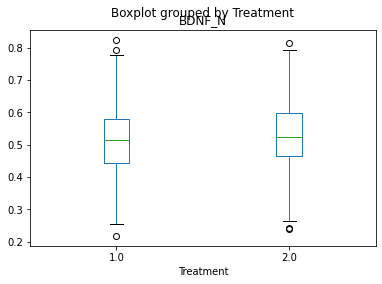

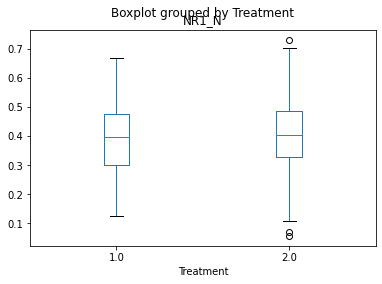

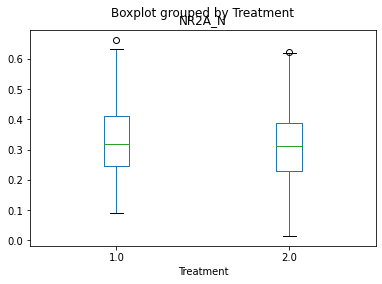

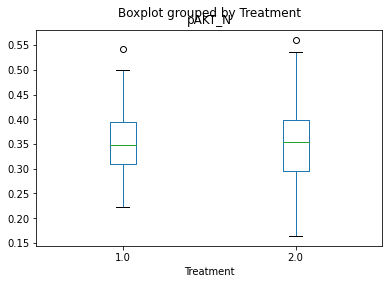

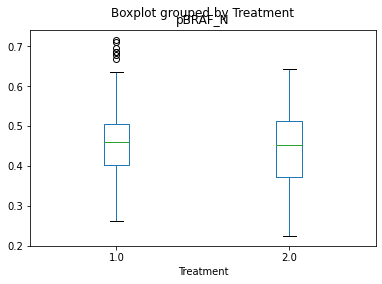

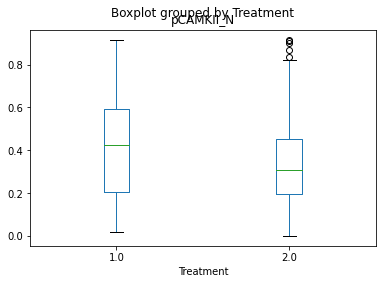

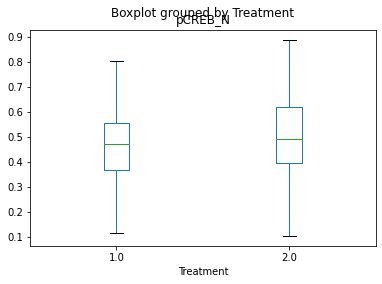

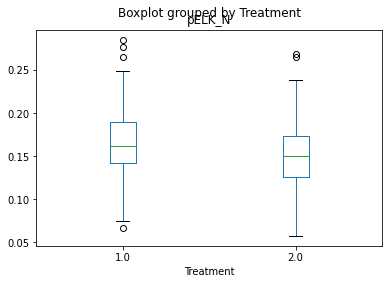

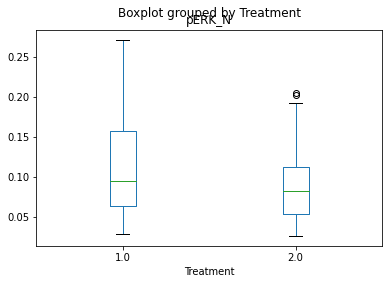

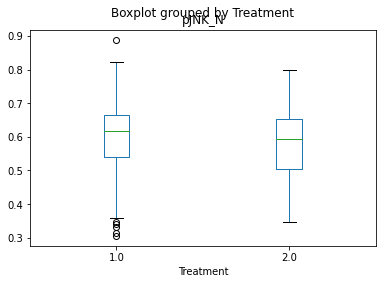

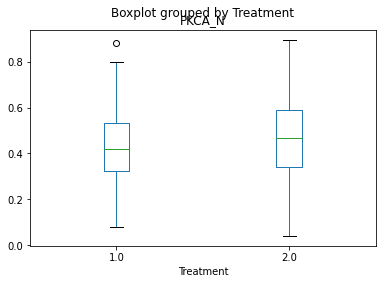

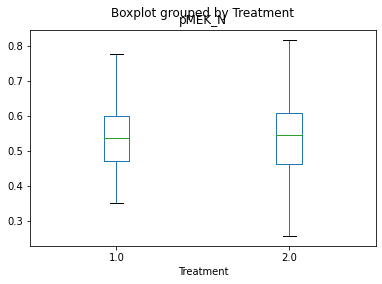

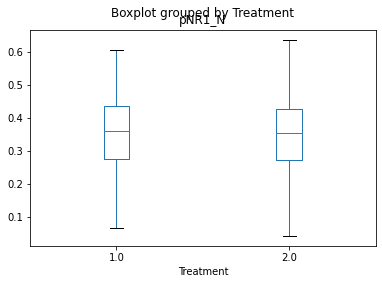

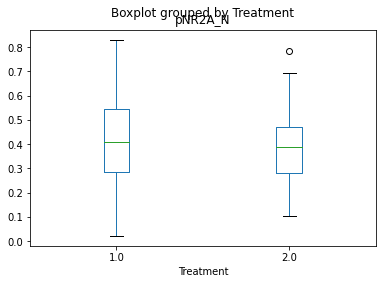

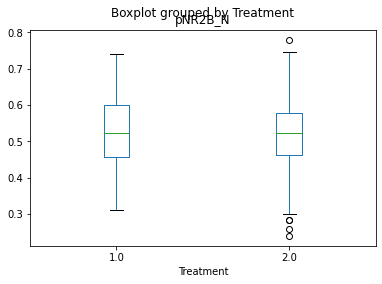

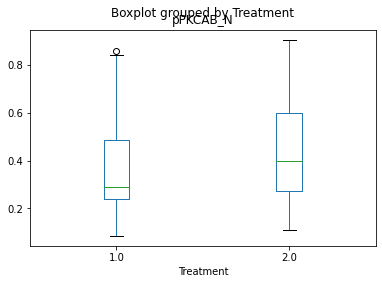

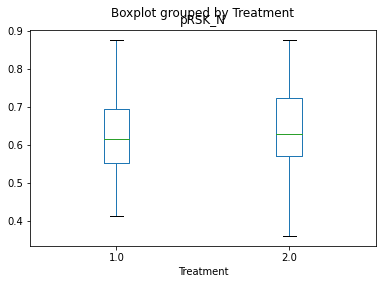

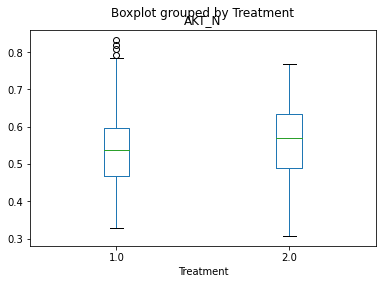

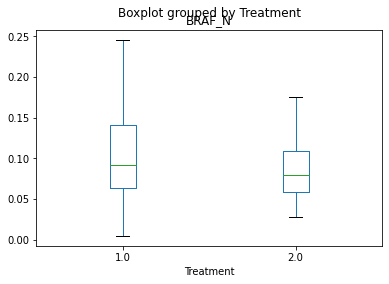

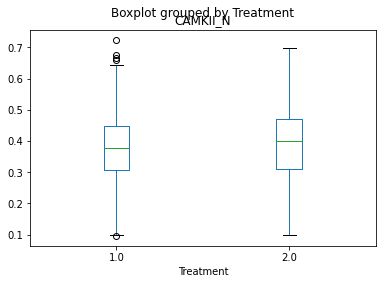

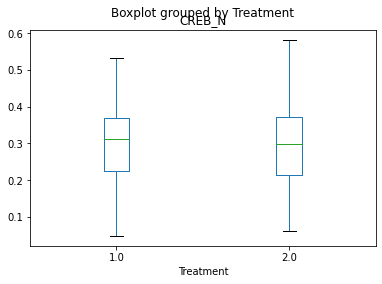

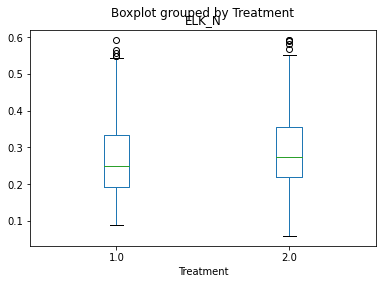

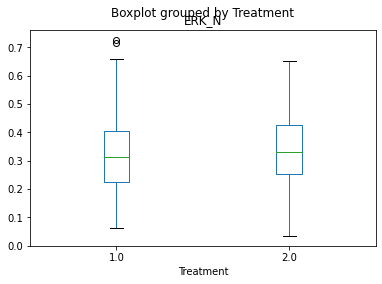

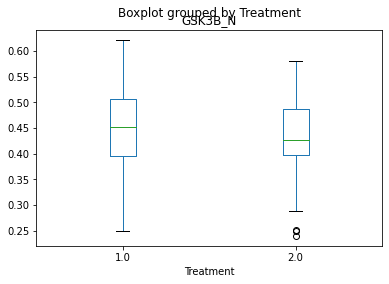

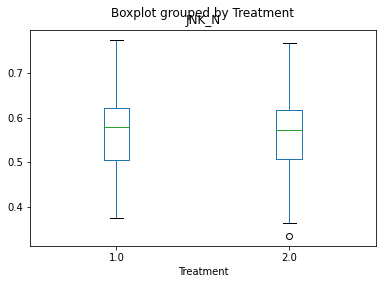

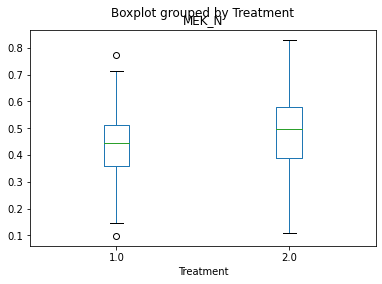

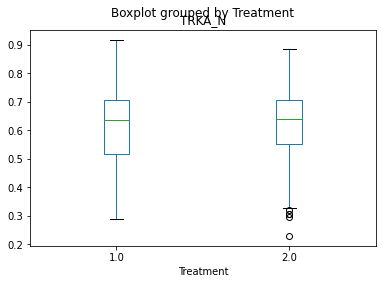

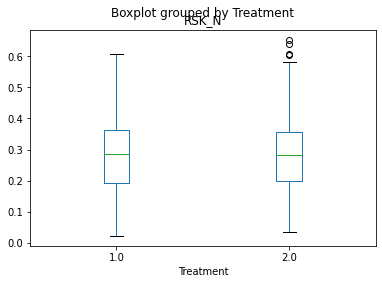

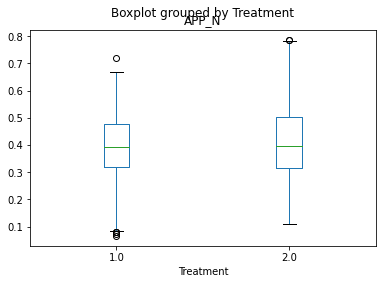

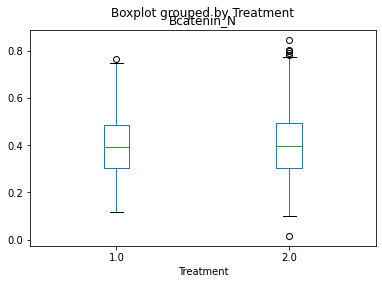

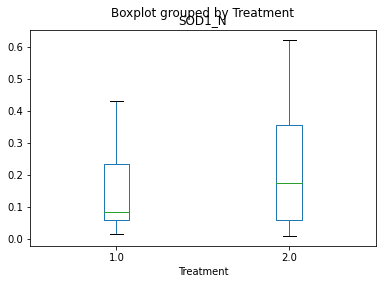

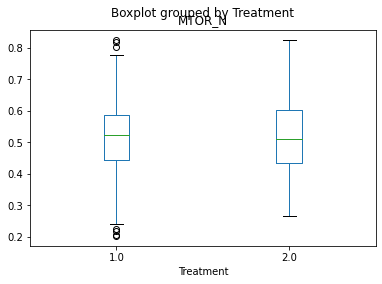

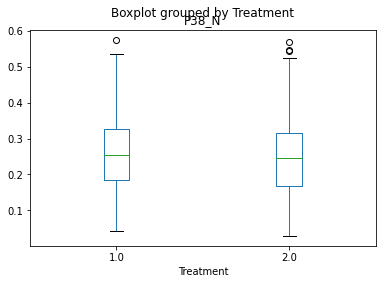

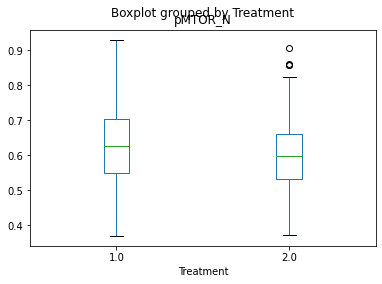

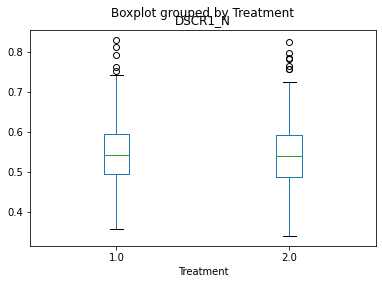

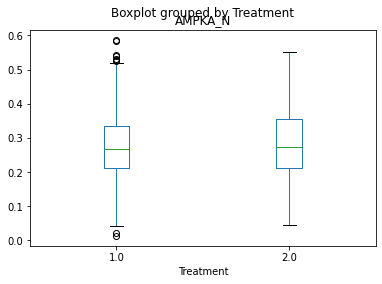

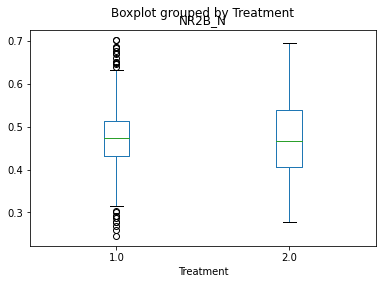

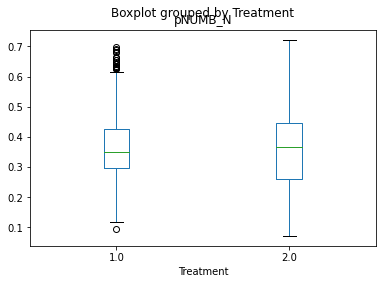

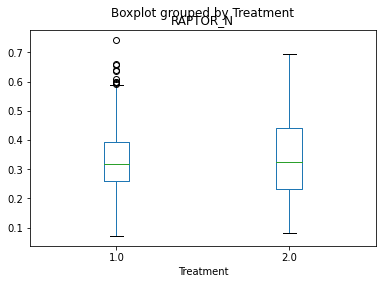

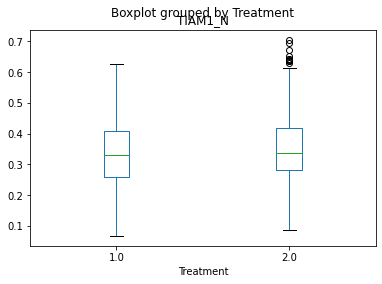

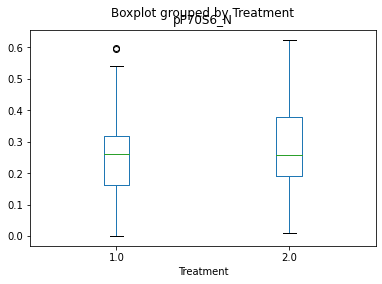

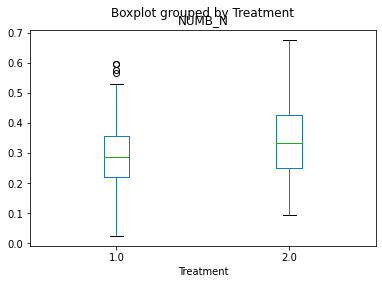

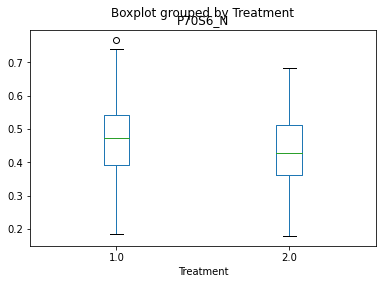

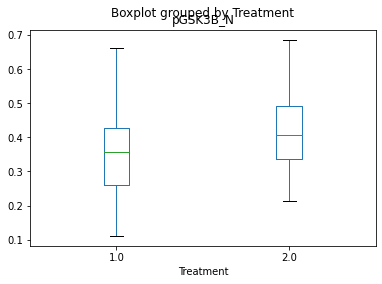

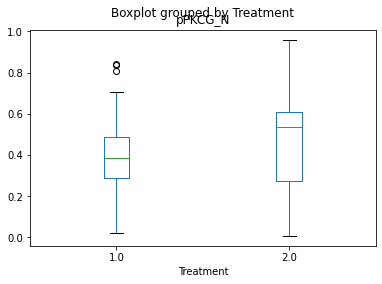

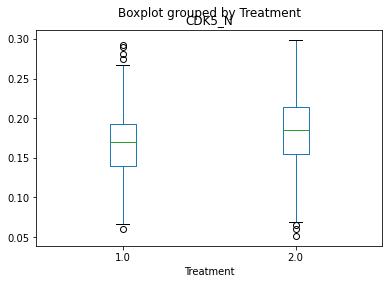

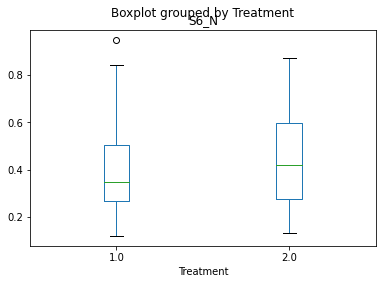

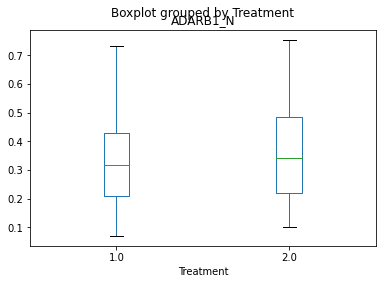

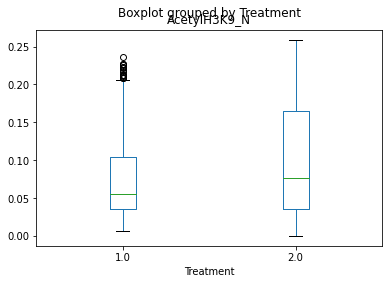

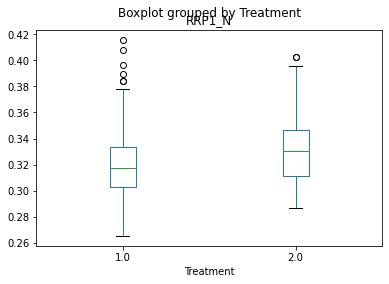

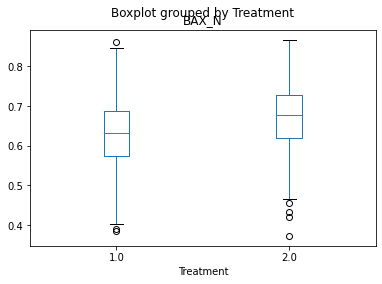

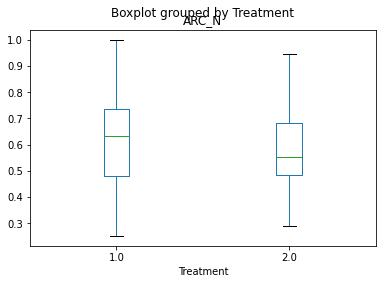

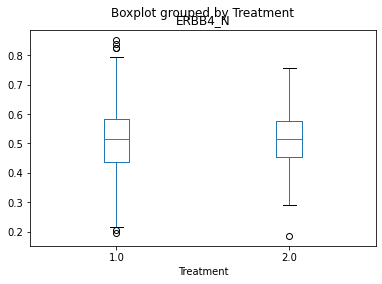

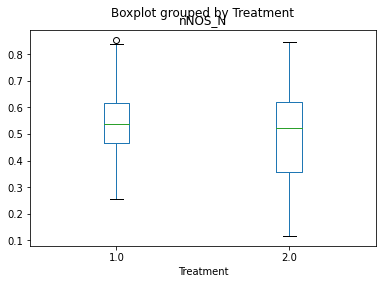

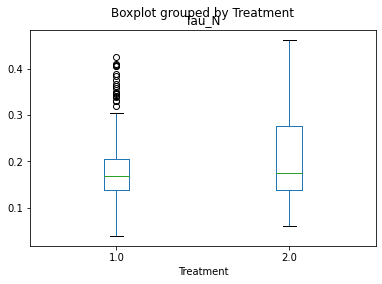

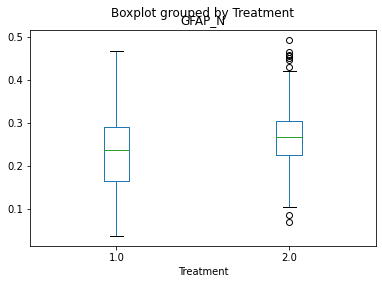

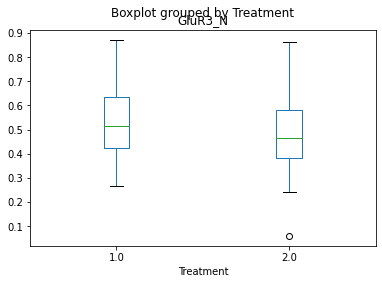

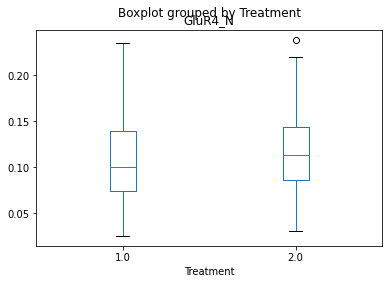

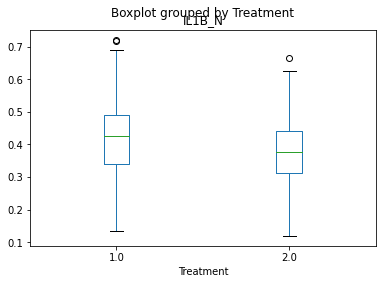

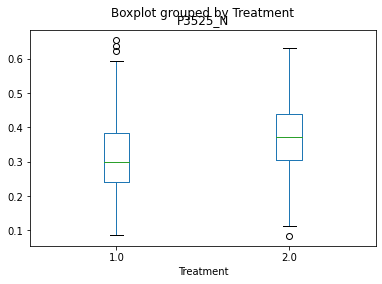

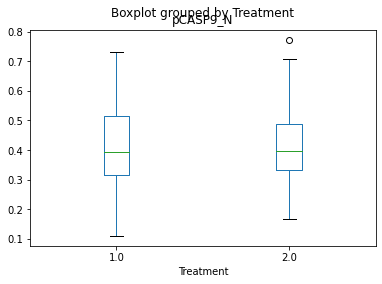

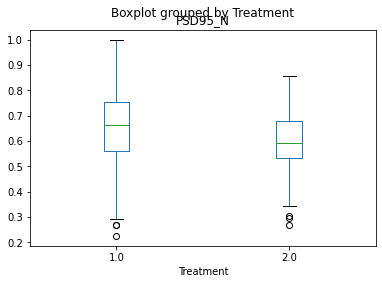

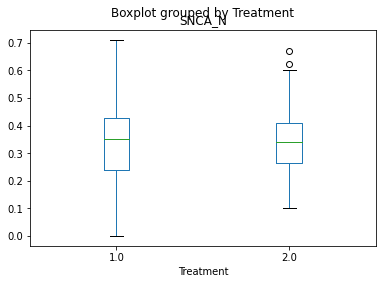

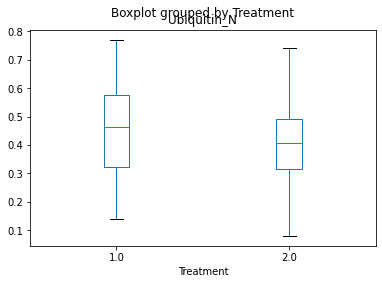

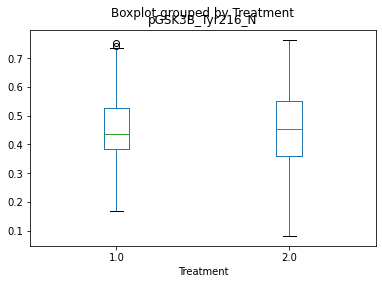

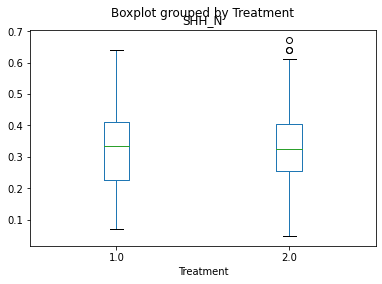

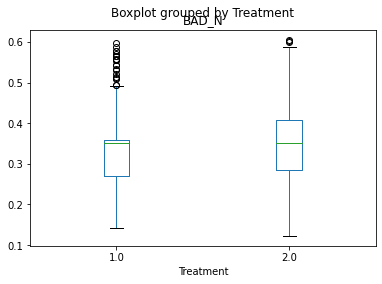

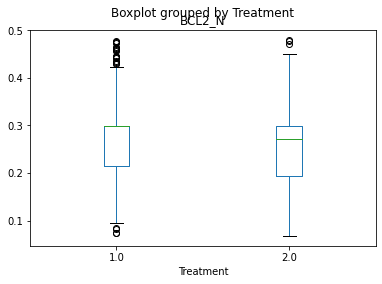

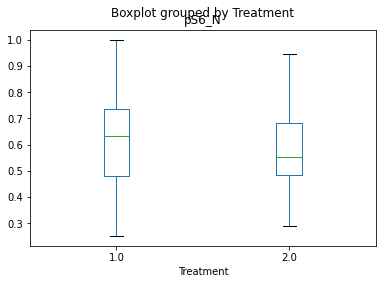

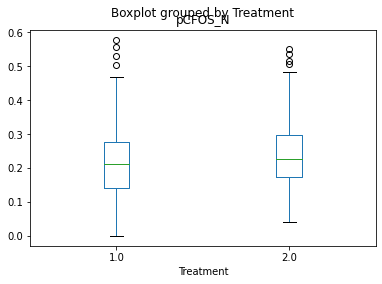

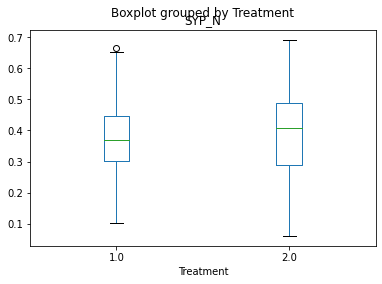

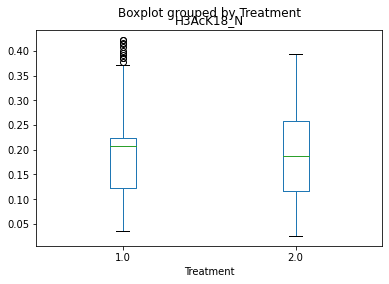

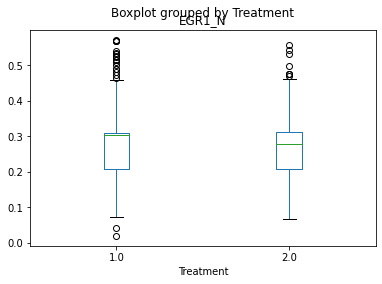

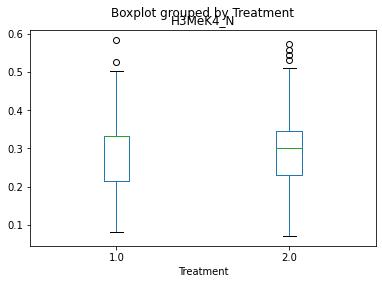

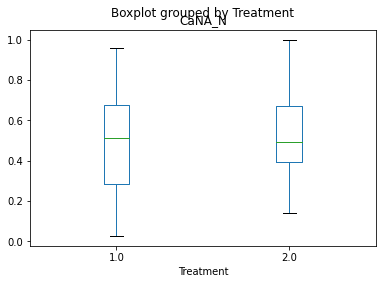

In [334]:
import matplotlib.pyplot as plt  
% matplotlib inline 

X_fix = df_out.drop("Treatment",1)
y_fix = df_out["Treatment"]
columns_name = list(X_fix.columns)

for i in column_name:
  df_out.boxplot(by ='Treatment', column =[i], grid = False) 
  

In [81]:
df_out

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment
0,0.151122,0.212885,0.824638,0.612119,0.630482,0.327006,0.448666,0.168257,0.617322,0.232553,0.157643,0.576167,0.747688,0.598504,0.574775,0.286697,0.650637,0.698164,0.622784,0.711198,0.136915,0.419649,0.317149,0.593715,0.627907,0.596269,0.640167,0.643070,0.766146,0.295596,0.549817,0.747441,0.092035,0.541196,0.152338,0.687269,0.553922,0.467278,0.509996,0.469461,0.436170,0.506018,0.163368,0.323059,0.373254,0.604516,0.303363,0.178458,0.324085,0.402810,0.083584,0.327870,0.690257,0.426816,0.412721,0.477834,0.057168,0.228825,0.531163,0.151103,0.242608,0.169702,0.432843,0.483783,0.044770,0.256699,0.405228,0.162941,0.177312,0.299172,0.426816,0.133930,0.336299,0.087715,0.102890,0.084580,0.705738,1.0
1,0.155750,0.188226,0.776455,0.601070,0.585247,0.311887,0.429899,0.154925,0.590173,0.205362,0.159721,0.559556,0.688545,0.559598,0.502766,0.270688,0.587926,0.591606,0.629311,0.689095,0.128911,0.383669,0.291583,0.548032,0.578736,0.584234,0.614355,0.586180,0.724593,0.251840,0.491969,0.701976,0.075589,0.467650,0.137451,0.621033,0.512117,0.409897,0.457694,0.410046,0.383101,0.447496,0.145594,0.322736,0.376914,0.618918,0.302059,0.177452,0.324004,0.386524,0.084514,0.326426,0.664894,0.429952,0.463251,0.488028,0.075103,0.251911,0.576828,0.149555,0.285860,0.212421,0.472327,0.477640,0.054452,0.226088,0.433471,0.220010,0.146494,0.299172,0.429952,0.110434,0.365208,0.080692,0.115874,0.093977,0.749771,1.0
2,0.153459,0.205696,0.793572,0.558911,0.575910,0.306369,0.441381,0.153485,0.607102,0.199194,0.154554,0.541938,0.670905,0.560573,0.554483,0.283848,0.590443,0.581558,0.669753,0.670907,0.128651,0.415579,0.292676,0.549983,0.599925,0.580790,0.625756,0.613502,0.730384,0.270560,0.472444,0.710718,0.076445,0.470688,0.137475,0.616142,0.510175,0.375653,0.467725,0.400225,0.356363,0.432379,0.125773,0.334325,0.383316,0.657565,0.332565,0.189744,0.369553,0.373234,0.094486,0.312439,0.700212,0.448652,0.415863,0.475009,0.071718,0.248192,0.607535,0.150434,0.373879,0.202733,0.467603,0.484953,0.044526,0.214719,0.429387,0.186816,0.155920,0.299172,0.448652,0.121560,0.353621,0.080465,0.109050,0.082162,0.868229,1.0
3,0.125169,0.157688,0.637326,0.468152,0.480646,0.335530,0.444307,0.132074,0.486945,0.205135,0.127028,0.554293,0.657048,0.640641,0.413245,0.211238,0.522319,0.627585,0.687775,0.593408,0.121509,0.401866,0.319599,0.342080,0.452058,0.545716,0.625528,0.492220,0.667283,0.277208,0.440780,0.536330,0.076936,0.479533,0.144945,0.605654,0.514305,0.338199,0.461189,0.406715,0.402786,0.422989,0.267936,0.220414,0.311501,0.549444,0.364189,0.181101,0.231762,0.333033,0.076248,0.338264,0.669358,0.392700,0.372772,0.397939,0.053257,0.245676,0.562594,0.156083,0.242672,0.184790,0.364359,0.449304,0.119259,0.208943,0.407971,0.179047,0.229602,0.299172,0.392700,0.151031,0.265619,0.126763,0.164241,0.144543,0.721879,1.0
4,0.122146,0.157838,0.637787,0.426467,0.441977,0.314976,0.433100,0.129086,0.410194,0.189152,0.117572,0.532161,0.608970,0.551236,0.401706,0.200364,0.486489,0.579839,0.698127,0.557701,0.112407,0.381348,0.297196,0.358746,0.433909,0.519977,0.599623,0.471524,0.627685,0.239874,0.410395,0.519186,0.067645,0.436522,0.121261,0.548237,0.501294,0.283304,0.416698,0.372548,0.353712,0.374357,0.262839,0.212521,0.317400,0.559551,0.376199,0.181805,0.258720,0.337126,0.079697,0.330219,0.686524,0.410187,0.385008,0.422195,0.080162,0.234762,0.656300,0.147044,0.325597,0.187625,0.393332,0.480334,0.116965,0.215528,0.480342,

In [83]:
df_out["Treatment"].value_counts()

1.0    298
2.0    245
Name: Treatment, dtype: int64

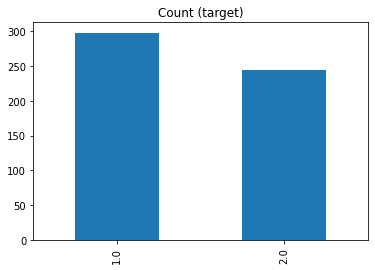

In [336]:
df_out["Treatment"].value_counts().plot(kind='bar', title='Count (target)')

# Resampling

In [84]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_out.iloc[:,:-1]
y = df_out.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.25%


In [85]:
df["Treatment"].unique()

array([1., 2.])

Confusion matrix:
 [[60  0]
 [ 3 46]]


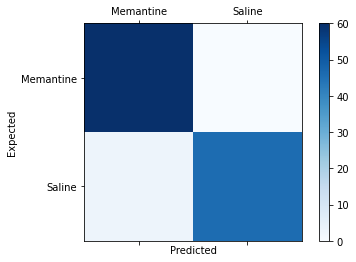

In [86]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)


labels = ['Memantine', 'Saline']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [88]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [341]:
print(Counter(y))

Counter({1.0: 298, 2.0: 245})


1. Random Over Sampling


Random oversampling, atau oversampling secara acak adalah teknik oversampling 
di mana anggota dari kelas minoritas dipilih secara acak dan diduplikasi ke dataset yang baru hingga tercapai keseimbangan (Liu, 2004). Data minoritas tersebut dapat diduplikasi beberapa kali. Teknik ini biasanya menyebabkan overfitting pada model(Amin, et al., 2016; Liu, 2004)

In [89]:
# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)

# new class distribution 
print(Counter(y_ros))

Counter({1.0: 298, 2.0: 298})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


2. SMOTE

SMOTE atau Synthetic Minority Oversampling Technique adalah teknik 
oversampling terpopuler yang diproposalkan oleh Chawla (Chawla, Bowyer, Hall, & 
Kegelmeyer, 2002) pada tahun 2002. Teknik ini membuat data tiruan atau sintetik 
berdasarkan tetangga-tetangga terdekat dari sampel kelas minoritas.

 ![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png)
 

In [90]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

print(Counter(y_sm))

Counter({1.0: 298, 2.0: 298})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


3. SMOTE Tomek

In [91]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

print(Counter(y_smt))

Counter({1.0: 298, 2.0: 298})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


4. Random Under Sampling

Random undersampling, atau undersampling secara acak adalah teknik 
undersampling di mana anggota dari kelas mayoritas dipilih secara acak dan dihapus dari dataset training hingga tercapai keseimbangan. Kekurangan dari teknik ini adalah tidak ada cara untuk mengatur informasi apa saja yang dihilangkan dari dataset tersebut, informasi yang berguna bisa saja hilang (Amin, et al., 2016; Liu, 2004; Yen & Lee, 2006; More, 2016)

In [92]:
# instantiating the random undersampler
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(X, y)

# new class distribution
print(Counter(y_rus))

Counter({1.0: 245, 2.0: 245})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


5. Tomek Links

Tomek Link atau tautan Tomek adalah metode undersampling yang diproposalkan 
oleh Tomek (Tomek, 1976) untuk memodifikasi CNN (Condensed Nearest Neighbor). 
Teknik ini menghapus sampel kelas mayoritas jika dan hanya jika tetangga kelas 
mayoritas tersebut berasal dari kelas berbeda dan merupakan tetangga terdekat satu sama lain. 

In [93]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print(Counter(y_tl))

Counter({1.0: 298, 2.0: 245})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


6. Cluster Centroids

In [94]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X, y)

print(Counter(y_cc))

Counter({1.0: 245, 2.0: 245})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [348]:
# # instantiating over and under sampler
# over = RandomOverSampler(sampling_strategy=0.5)
# under = RandomUnderSampler(sampling_strategy=0.8)

# # first performing oversampling to minority class
# X_over, y_over = over.fit_resample(X, y)
# print(f"Oversampled: {Counter(y_over)}")

# # now to comine under sampling 
# X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
# print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

In [95]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = X_sm
y = y_sm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.17%


Confusion matrix:
 [[60  0]
 [ 1 59]]


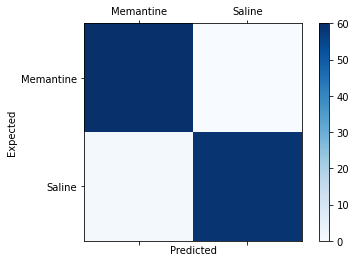

In [96]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)


labels = ['Memantine', 'Saline']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()